## **Website Based Customer Churn Analysis**
---

- Task : Classification
- Objective : Predict the churn score for a website based on the features provided in the dataset

### **Data description :**

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:
- User demographic information
- Browsing behavior
- Historical purchase data among other information

It factors in our unique and proprietary predictions of how long a user will remain a customer.

**Features**

There are 23 variables:
- `age` : Represents the age of a customer (Integer)
- `gender` : Represents the gender of a customer (Object: "F", "M")
- `security_no` : Represents a unique security number that is used to identify a person (Object)
- `region_category` : Represents the region that a customer belongs to (Object : "Village", "City", "Town")
- `membership_category` : Represents the category of the membership that a customer is using (Object : "Basic Membership", "Silver Membership", "Platinum Membership", "Gold Membership", , "No Membership", "Premium Membership")
- `joining_date` : Represents the date when a customer became a member (Date)
- `joined_through_referral` : Represents whether a customer joined using any referral code or ID (Object : "Yes", "No")
- `referral_id` : Represents a referral ID (Object)
- `preferred_offer_types` : Represents the type of offer that a customer prefers (Object : "Gift Vouchers/Coupons", "Credit/Debit Card Offers", "Without Offers")
- `medium_of_operation` : Represents the medium of operation that a customer uses for transactions (Object : "Desktop", "Smartphone", "Both")
- `internet_option` : Represents the type of internet service a customer uses (Object : "Wi-Fi", "Mobile_Data", "Fiber_Optic")
- `last_visit_time` : Represents the last time a customer visited the website (Time)
- `days_since_last_login` : Represents the no. of days since a customer last logged into the website (Integer)
- `avg_time_spent` : Represents the average time spent by a customer on the website (Float)
- `avg_transaction_value` : Represents the average transaction value of a customer (Float)
- `avg_frequency_login_days` : Represents the no. of times a customer has logged in to the website (Integer)
- `points_in_wallet` : Represents the points awarded to a customer on each transaction (Float)
- `used_special_discount` : Represents whether a customer uses special discounts offered (Object : "Yes", "No")
- `offer_application_preference` : Represents whether a customer prefers offers (Object : "Yes", "No")
- `past_complaint` : Represents whether a customer has raised any complaints (Object : "Yes", "No")
- `complaint_status` : Represents whether the complaints raised by a customer was resolved (Object : "Not Applicable", "Unsloved", "Solved", "Solved in Follow-up", "No Information Available")
- `feedback` : Represents the feedback provided by a customer (Object : "Poor Product Quality", "No reason specified", "Too many ads", "Poor Website", "Poor Customer Service", "Reasonable Price", "User Friendly Website", "Products always in Stock", "Quality Customer Care")
- `churn_risk_score` : Represents the churn risk score (Integer : "1", "0")


### **Data Preparation**

#### **1. Data Collection**

In [281]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from tqdm import tqdm
from datetime import datetime
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, auc, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import yaml
import joblib
import copy
import hashlib
import json

In [282]:
def importData(filename):
    """
    Function for import data and drop duplicate
    :param filename: <string> input file name (format .csv)
    :return df: <pandas dataframe> sample data
    """
    
    #read data
    df = pd.read_csv(filename, index_col=0)
    print("Data asli            : ",df.shape)

    #drop duplicates
    df = df.drop_duplicates()
    print   ("Data setelah di drop :", df.shape)

    return df

In [283]:
file_churn = "../data/raw/churn.csv"
churn = importData(filename = file_churn)

Data asli            :  (36992, 23)
Data setelah di drop : (36992, 23)


There is no duplication in dataset.

In [284]:
churn.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [285]:
churn.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [286]:
type(churn)

pandas.core.frame.DataFrame

In [287]:
#save to pickle
joblib.dump(churn, "../data/processed/churn_raw.pkl")

['../data/processed/churn_raw.pkl']

### **2. Data Definition**

In [288]:
params_dir = "../config/params.yaml"

In [289]:
def load_params(param_dir):
    """
    Function for open parameters
    :param param_dir: <string> parameter file name (format .yaml)
    :return params: <dict> load yaml
    """
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)

    return params

In [290]:
params = load_params(params_dir)
params

{'dataset_dir': '../data/raw/',
 'object_columns': ['gender',
  'security_no',
  'region_category',
  'membership_category',
  'joining_date',
  'joined_through_referral',
  'referral_id',
  'preferred_offer_types',
  'medium_of_operation',
  'internet_option',
  'last_visit_time',
  'avg_frequency_login_days',
  'used_special_discount',
  'offer_application_preference',
  'past_complaint',
  'complaint_status',
  'feedback'],
 'int_columns': ['age', 'days_since_last_login', 'churn_risk_score'],
 'float_columns': ['avg_time_spent',
  'avg_transaction_value',
  'points_in_wallet'],
 'label': ['churn_risk_score'],
 'predictors': ['age',
  'days_since_last_login',
  'points_in_wallet',
  'gender',
  'region_category',
  'membership_category',
  'joined_through_referral',
  'preferred_offer_types',
  'medium_of_operation',
  'internet_option',
  'used_special_discount',
  'offer_application_preference',
  'past_complaint',
  'complaint_status',
  'feedback'],
 'range_gender': ['F', 'M', 'U

#### 2.1 Data Defense

In [291]:
def check_data(input_data, params):
    #check column data types
    assert input_data.select_dtypes("float").columns.to_list() == params["float_columns"], "an error occurs in float column(s)."
    assert input_data.select_dtypes("object").columns.to_list() == params["object_columns"], "an error occurs in object column(s)."
    assert input_data.select_dtypes("int").columns.to_list() == params["int_columns"], "an error occurs in int column(s)."

    # Check range of gender
    assert set(input_data.gender).issubset(set(params["range_gender"])), "an error occurs in gender range."
    # Check range of membership_category
    assert set(input_data.membership_category).issubset(set(params["range_membership_category"])), "an error occurs in membership_category range."
    # Check range of joined_through_referral
    assert set(input_data.joined_through_referral).issubset(set(params["range_joined_through_referral"])), "an error occurs in joined_through_referral range."
    # Check range of medium_of_operation
    assert set(input_data.medium_of_operation).issubset(set(params["range_medium_of_operation"])), "an error occurs in medium_of_operation range."
    # Check range of internet_option
    assert set(input_data.internet_option).issubset(set(params["range_internet_option"])), "an error occurs in internet_option range."
    # Check range of used_special_discount
    assert set(input_data.used_special_discount).issubset(set(params["range_used_special_discount"])), "an error occurs in used_special_discount range."
    # Check range of offer_application_preference
    assert set(input_data.offer_application_preference).issubset(set(params["range_offer_application_preference"])), "an error occurs in offer_application_preference range."
    # Check range of past_complaint
    assert set(input_data.past_complaint).issubset(set(params["range_past_complaint"])), "an error occurs in past_complaint range."
    # Check range of complaint_status
    assert set(input_data.complaint_status).issubset(set(params["range_complaint_status"])), "an error occurs in complaint_status range."
    # Check range of feedback
    assert set(input_data.feedback).issubset(set(params["range_feedback"])), "an error occurs in feedback range."
    
    #check range of age
    assert input_data[params["int_columns"][0]].between(
                params["range_age"][0],
                params["range_age"][1]
                ).sum() == len(input_data), "an error occurs in range_age."    
    #check range of days_since_last_login
    assert input_data[params["int_columns"][1]].between(
                params["range_days_since_last_login"][0],
                params["range_days_since_last_login"][1]
                ).sum() == len(input_data), "an error occurs in range_days_since_last_login."    
    #check range of churn_risk_score
    assert input_data[params["int_columns"][2]].between(
                params["range_churn_risk_score"][0],
                params["range_churn_risk_score"][1]
                ).sum() == len(input_data), "an error occurs in range_churn_risk_score." 

In [292]:
check_data(churn, params)

### **3. Splitting Data**

* Input-Output Split, Train-Test Split
* Processing Categorical
* Imputation, Normalization, Drop Duplicates
* Fitur churn_risk_score is output from data churn
* Other fitur is input

#### 3.1 Input-Output Split

In [293]:
churn.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [294]:
churn.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [295]:
def extractInputOutput(data,
                       output_column_name):
    """
    Function for separate input and output
    :param data: <pandas dataframe> whole sample data
    :param output_column_name: <string> output column name
    :return input_data: <pandas dataframe> data input
    :return output_data: <pandas series> data output
    """
    output_data = data[output_column_name]
    input_data = data.drop(output_column_name, axis=1)
    
    return input_data, output_data

#(data, output_column_name) = argument
#argument is a variable
#if the function given data argument = churn
#then all 'data' variables in the function will change to churn

In [296]:
#do not get the wrong order in the placement of returns
X, y = extractInputOutput(data = churn,
                           output_column_name="churn_risk_score")

In [297]:
X.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,16,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website


In [298]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: churn_risk_score, dtype: int64

In [299]:
churn.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


#### 3.2 Train-Test Split

In [300]:
#Split data to train, valid and test
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.30,
                                                    random_state = 42,
                                                    stratify = y)

X_valid, X_test, y_valid, y_test = train_test_split(X_test,
                                                    y_test,
                                                    test_size = 0.5,
                                                    random_state = 42,
                                                    stratify = y_test)

In [301]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_valid shape:{X_valid.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_valid shape: {y_valid.shape}")

X_train shape: (25894, 22)
X_test shape: (5549, 22)
X_valid shape:(5549, 22)
y_train shape: (25894,)
y_test shape: (5549,)
y_valid shape: (5549,)


In [302]:
len(X_test)/len(X)

0.15000540657439446

In [303]:
print(X_test.shape[0]/churn.shape[0])

0.15000540657439446


In [304]:
#save to pickle
joblib.dump(X_train, "../data/processed/X_train.pkl")
joblib.dump(y_train, "../data/processed/y_train.pkl")

joblib.dump(X_valid, "../data/processed/X_valid.pkl")
joblib.dump(y_valid, "../data/processed/y_valid.pkl")

joblib.dump(X_test, "../data/processed/X_test.pkl")
joblib.dump(y_test, "../data/processed/y_test.pkl")

['../data/processed/y_test.pkl']

### **4. Data Understanding**

In [305]:
churn.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


In [306]:
churn.describe(exclude=np.number)

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


*check count value data*

In [307]:
for i in X.columns:
    print(i, ":", len(X[i].value_counts()))

age : 55
gender : 3
security_no : 36992
region_category : 3
membership_category : 6
joining_date : 1096
joined_through_referral : 3
referral_id : 11359
preferred_offer_types : 3
medium_of_operation : 4
internet_option : 3
last_visit_time : 30101
days_since_last_login : 27
avg_time_spent : 25961
avg_transaction_value : 36894
avg_frequency_login_days : 1654
points_in_wallet : 23699
used_special_discount : 2
offer_application_preference : 2
past_complaint : 2
complaint_status : 5
feedback : 9


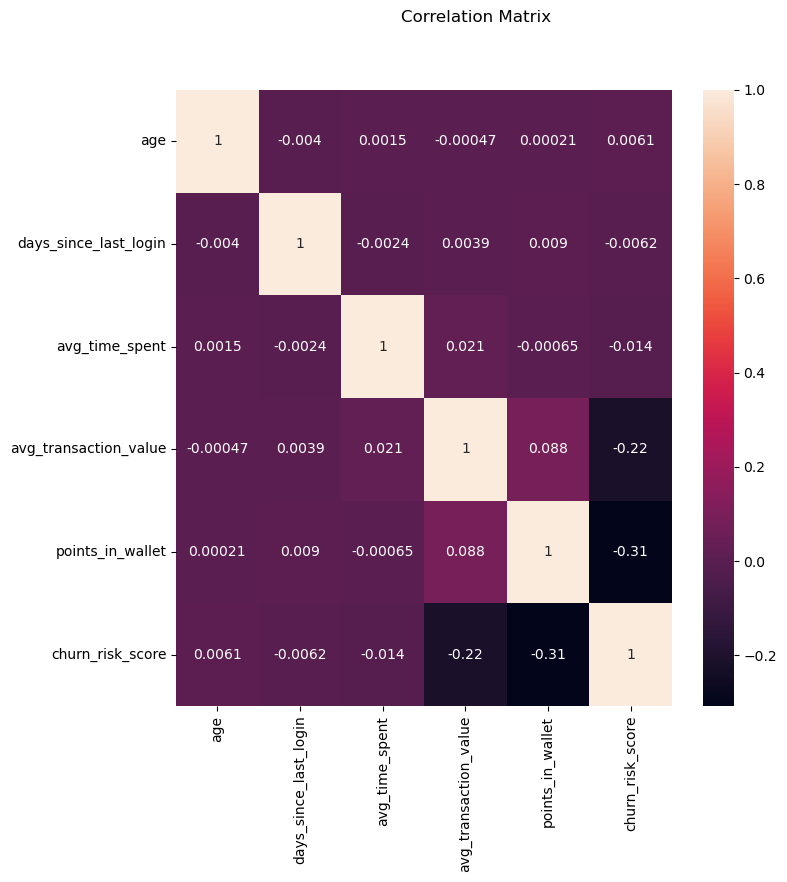

In [308]:
#check correlation
plt.figure(figsize=(8,8))
sns.heatmap(churn.corr(), annot=True)
plt.yticks(rotation=0);
plt.suptitle("Correlation Matrix");

In [309]:
churn.skew(numeric_only=True)

age                     -0.007319
days_since_last_login   -3.941356
avg_time_spent           0.539624
avg_transaction_value    1.011027
points_in_wallet        -0.080309
churn_risk_score        -0.164487
dtype: float64

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\378386274.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['age'])


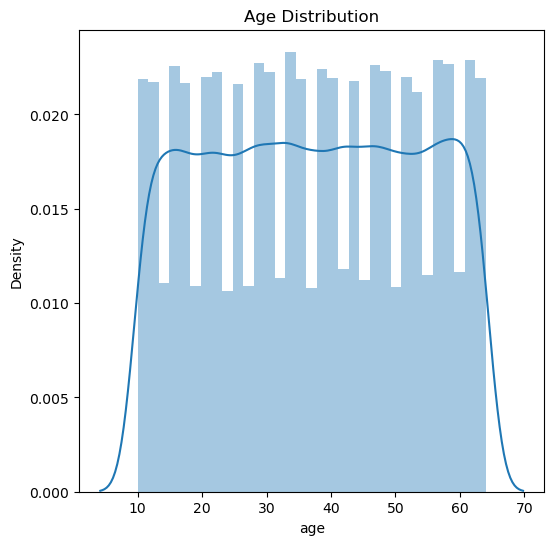

In [310]:
#age dist
plt.figure(figsize=(6,6))
sns.distplot(churn['age'])
plt.title('Age Distribution')
plt.show()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\3638050504.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['days_since_last_login'])


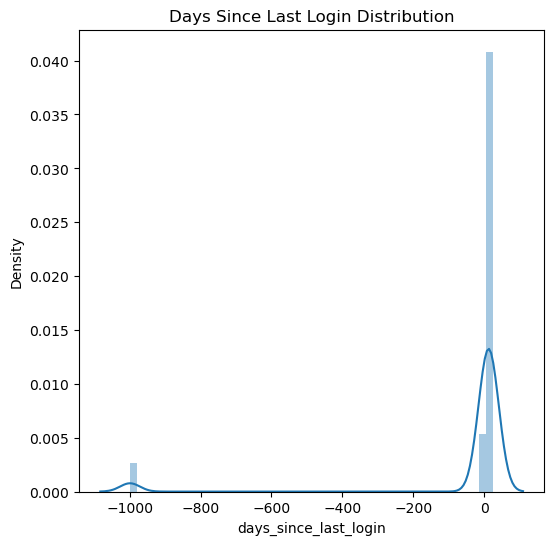

In [311]:
#days_since_last_login dist
plt.figure(figsize=(6,6))
sns.distplot(churn['days_since_last_login'])
plt.title('Days Since Last Login Distribution')
plt.show()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\3533526417.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['avg_time_spent'])


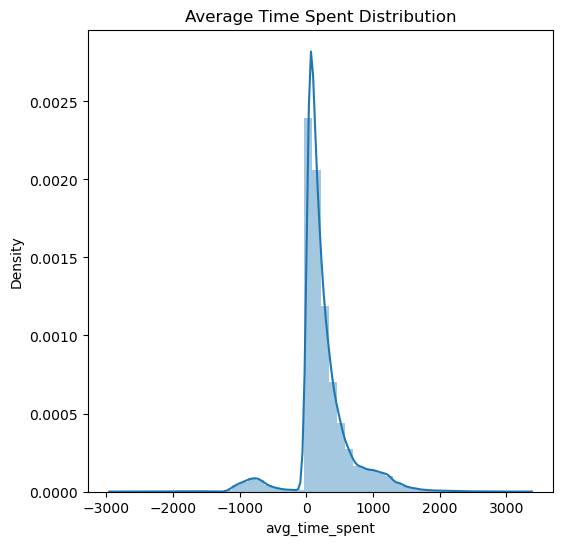

In [312]:
#avg_time_spent dist
plt.figure(figsize=(6,6))
sns.distplot(churn['avg_time_spent'])
plt.title('Average Time Spent Distribution')
plt.show()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\414017200.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['avg_transaction_value'])


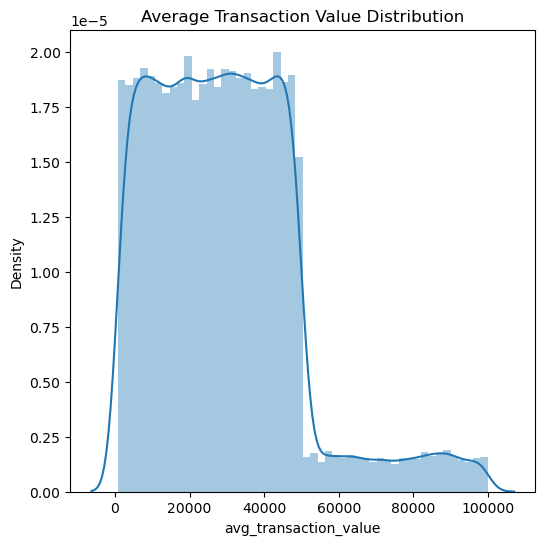

In [313]:
#avg_transaction_value dist
plt.figure(figsize=(6,6))
sns.distplot(churn['avg_transaction_value'])
plt.title('Average Transaction Value Distribution')
plt.show()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\807403867.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['points_in_wallet'])


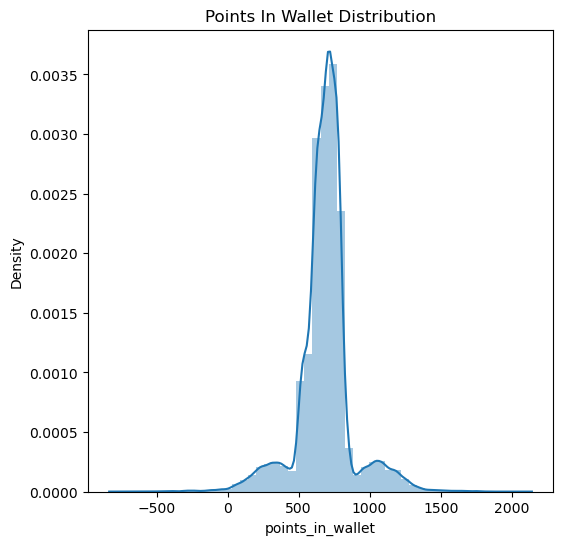

In [314]:
#points_in_wallet dist
plt.figure(figsize=(6,6))
sns.distplot(churn['points_in_wallet'])
plt.title('Points In Wallet Distribution')
plt.show()

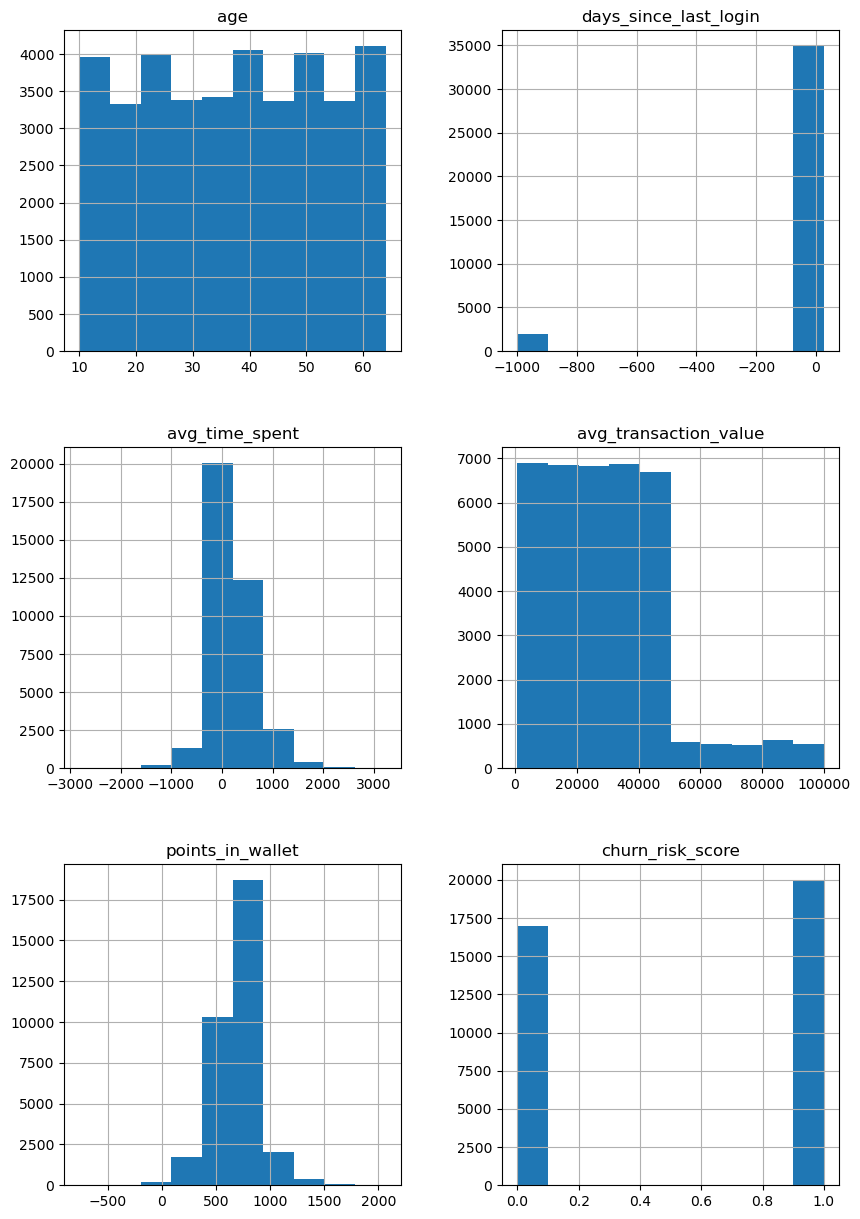

In [315]:
#all hist
churn.hist(figsize=(10,15))
plt.show()

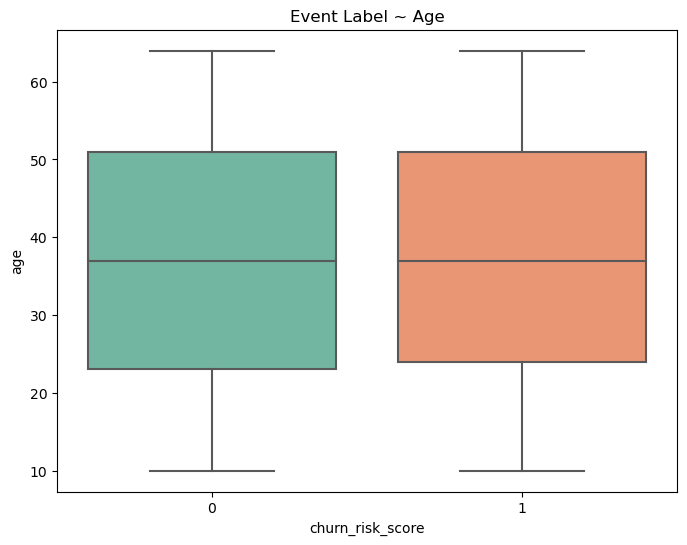

In [316]:
#check outliers age in churn_risk_score
plt.figure(figsize = (8,6))
sns.boxplot(data = churn, x = 'churn_risk_score', y = 'age', palette = 'Set2')
plt.title("Event Label ~ Age")
plt.show()

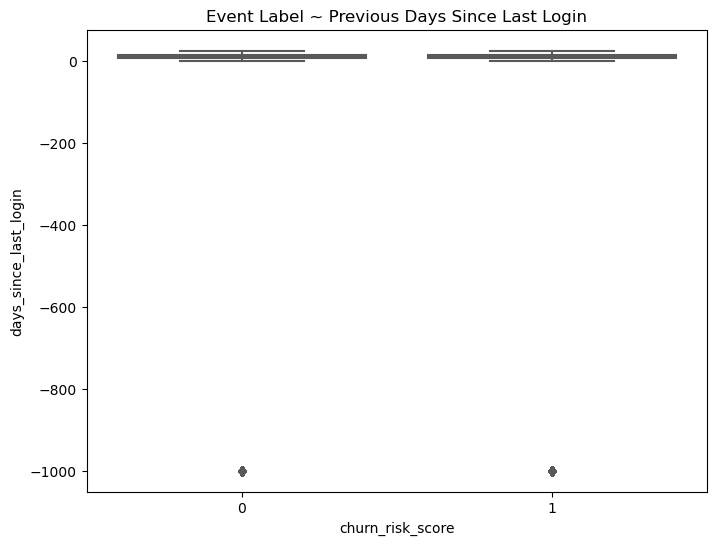

In [317]:
#check outliers days_since_last_login in churn_risk_score
plt.figure(figsize = (8,6))
sns.boxplot(data = churn, x = 'churn_risk_score', y = 'days_since_last_login', palette = 'Set2')
plt.title("Event Label ~ Previous Days Since Last Login")
plt.show()

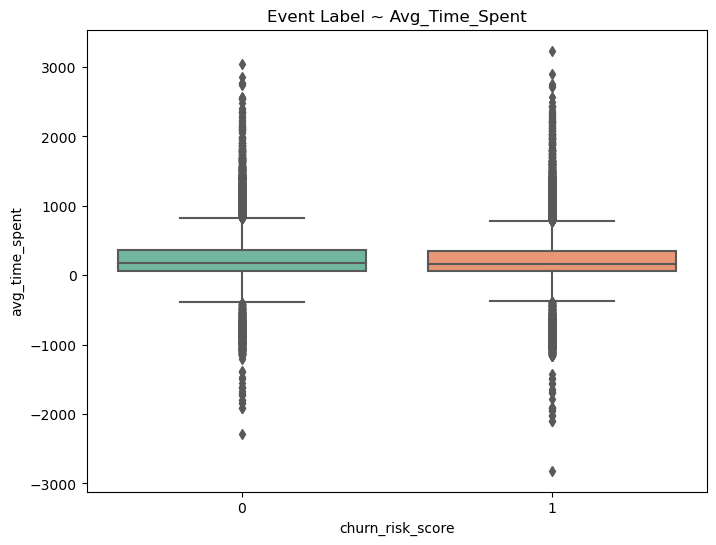

In [318]:
#check outliers avg_time_spent in churn_risk_score
plt.figure(figsize = (8,6))
sns.boxplot(data = churn, x = 'churn_risk_score', y = 'avg_time_spent', palette = 'Set2')
plt.title("Event Label ~ Avg_Time_Spent")
plt.show()

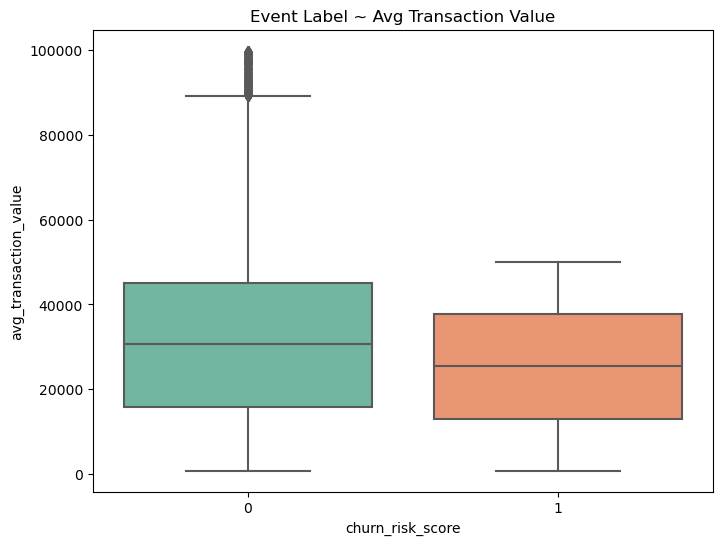

In [319]:
#check outliers avg_transaction_value in churn_risk_score
plt.figure(figsize = (8,6))
sns.boxplot(data = churn, x = 'churn_risk_score', y = 'avg_transaction_value', palette = 'Set2')
plt.title("Event Label ~ Avg Transaction Value")
plt.show()

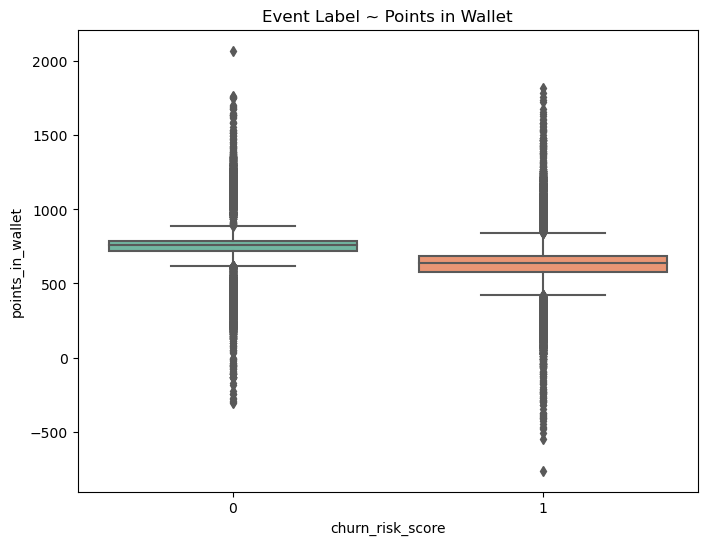

In [320]:
#check outliers points_in_wallet in churn_risk_score
plt.figure(figsize = (8,6))
sns.boxplot(data = churn, x = 'churn_risk_score', y = 'points_in_wallet', palette = 'Set2')
plt.title("Event Label ~ Points in Wallet")
plt.show()

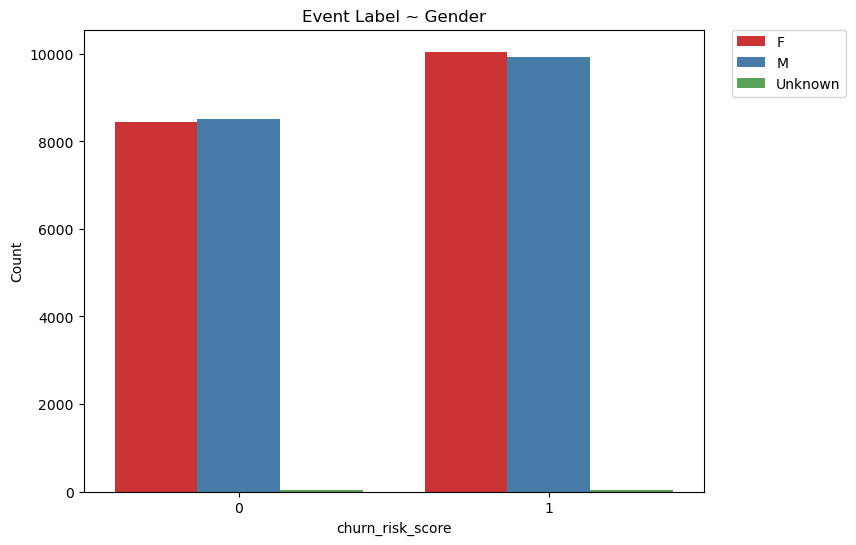

In [321]:
#plot gender in churn_risk_score
gender_label = churn.groupby(['churn_risk_score', 'gender']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = gender_label, x = 'churn_risk_score', y = 'Count', hue = 'gender', palette = 'Set1')
plt.title("Event Label ~ Gender")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

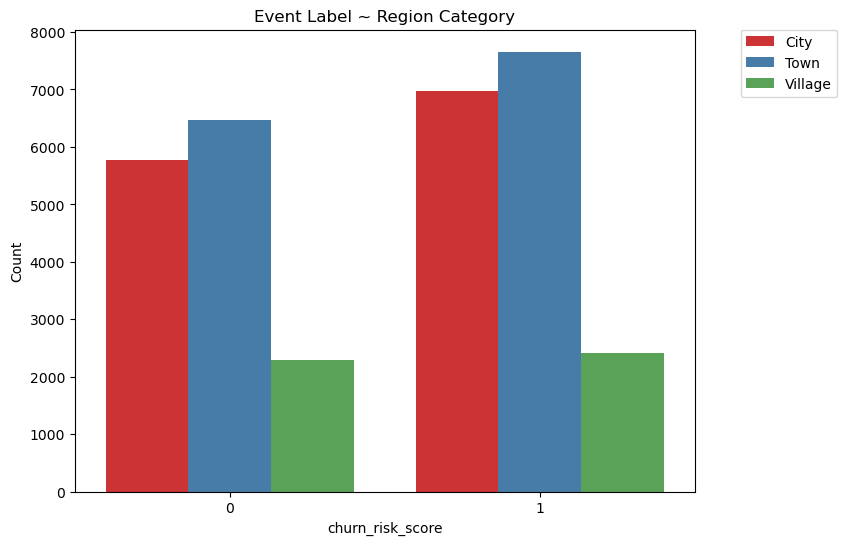

In [322]:
#plot region_category in churn_risk_score
region_label = churn.groupby(['churn_risk_score', 'region_category']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = region_label, x = 'churn_risk_score', y = 'Count', hue = 'region_category', palette = 'Set1')
plt.title("Event Label ~ Region Category")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

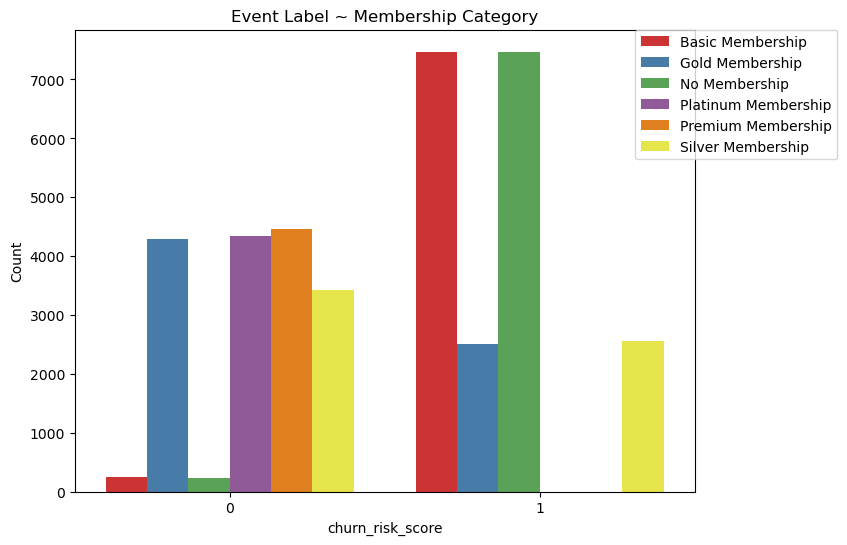

In [323]:
#plot membership_category in churn_risk_score
membership_label = churn.groupby(['churn_risk_score', 'membership_category']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = membership_label, x = 'churn_risk_score', y = 'Count', hue = 'membership_category', palette = 'Set1')
plt.title("Event Label ~ Membership Category")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

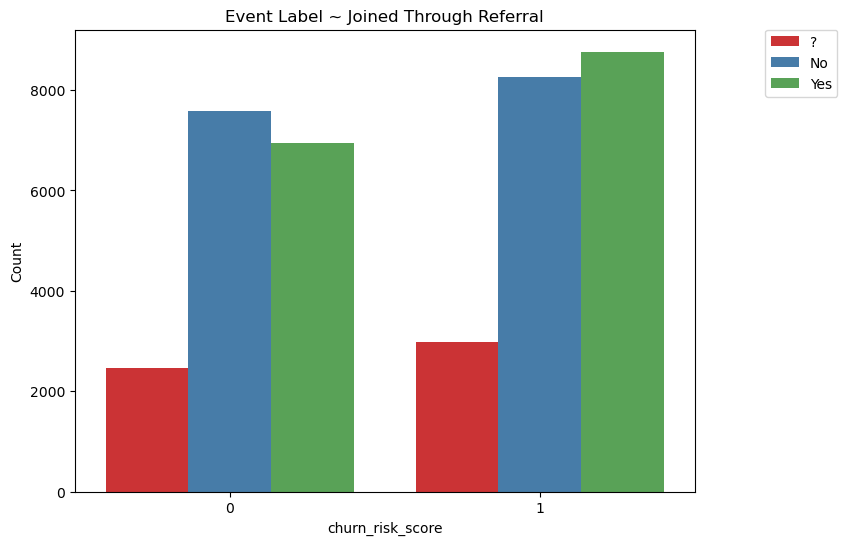

In [324]:
#plot joined_through_referral in churn_risk_score
referral_label = churn.groupby(['churn_risk_score', 'joined_through_referral']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = referral_label, x = 'churn_risk_score', y = 'Count', hue = 'joined_through_referral', palette = 'Set1')
plt.title("Event Label ~ Joined Through Referral")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

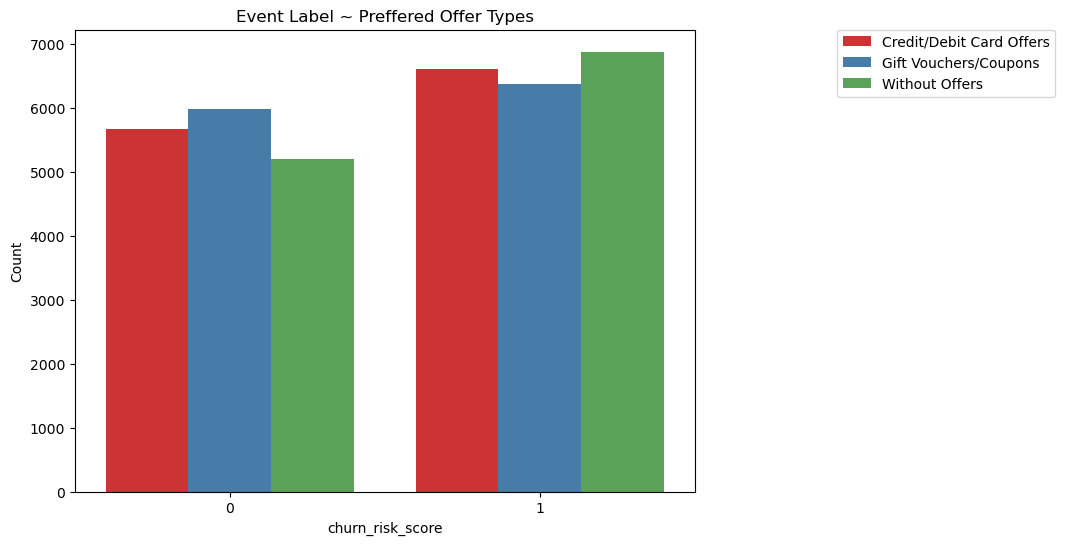

In [325]:
#plot preferred_offer_types in churn_risk_score
types_label = churn.groupby(['churn_risk_score', 'preferred_offer_types']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = types_label, x = 'churn_risk_score', y = 'Count', hue = 'preferred_offer_types', palette = 'Set1')
plt.title("Event Label ~ Preffered Offer Types")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

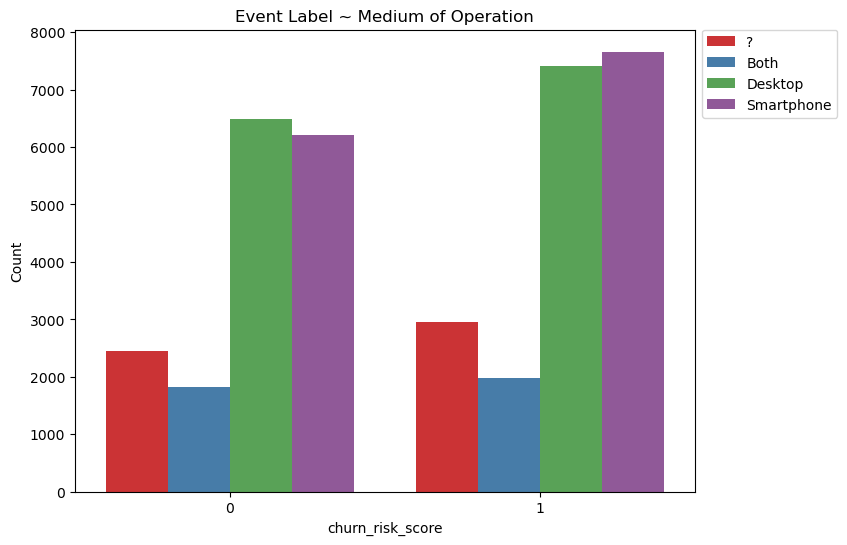

In [326]:
#plot medium_of_operation in churn_risk_score
medium_label = churn.groupby(['churn_risk_score', 'medium_of_operation']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = medium_label, x = 'churn_risk_score', y = 'Count', hue = 'medium_of_operation', palette = 'Set1')
plt.title("Event Label ~ Medium of Operation")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

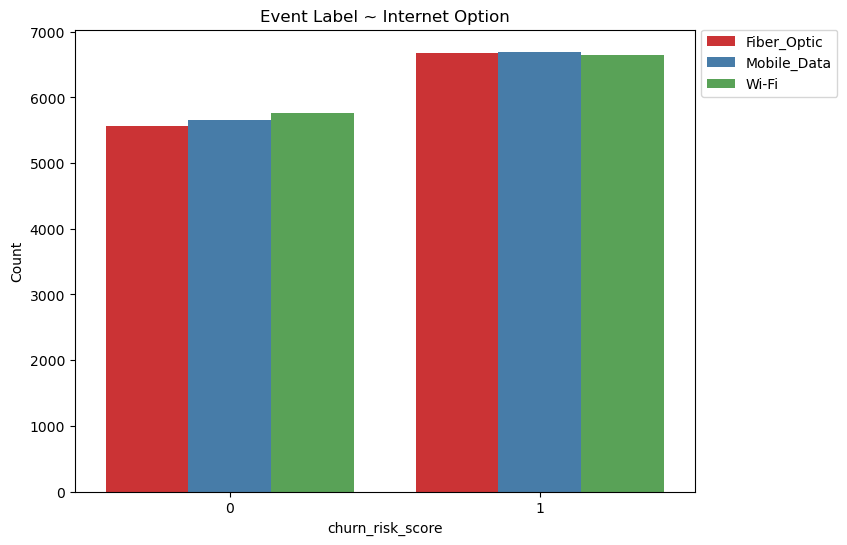

In [327]:
#plot internet_option in churn_risk_score
internet_label = churn.groupby(['churn_risk_score', 'internet_option']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = internet_label, x = 'churn_risk_score', y = 'Count', hue = 'internet_option', palette = 'Set1')
plt.title("Event Label ~ Internet Option")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

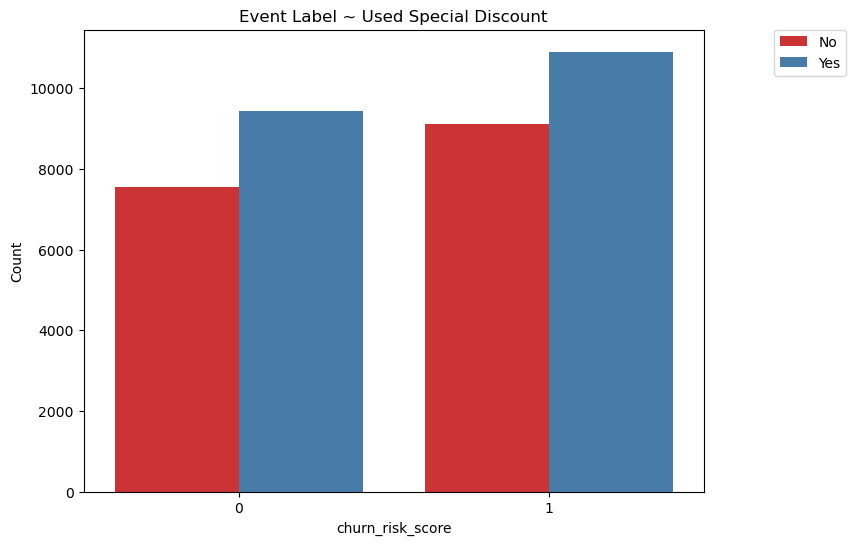

In [328]:
#plot used_special_discount in churn_risk_score
discount_label = churn.groupby(['churn_risk_score', 'used_special_discount']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = discount_label, x = 'churn_risk_score', y = 'Count', hue = 'used_special_discount', palette = 'Set1')
plt.title("Event Label ~ Used Special Discount")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

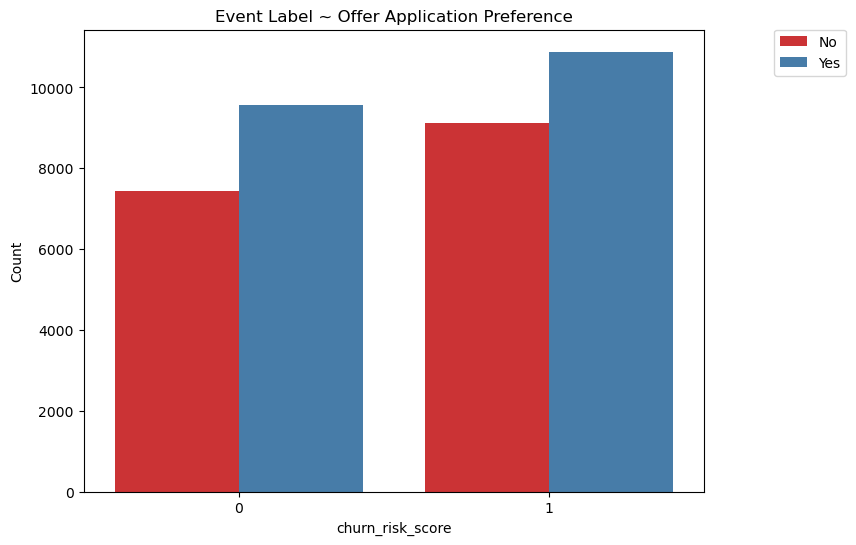

In [329]:
#plot offer_application_preference in churn_risk_score
app_label = churn.groupby(['churn_risk_score', 'offer_application_preference']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = app_label, x = 'churn_risk_score', y = 'Count', hue = 'offer_application_preference', palette = 'Set1')
plt.title("Event Label ~ Offer Application Preference")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

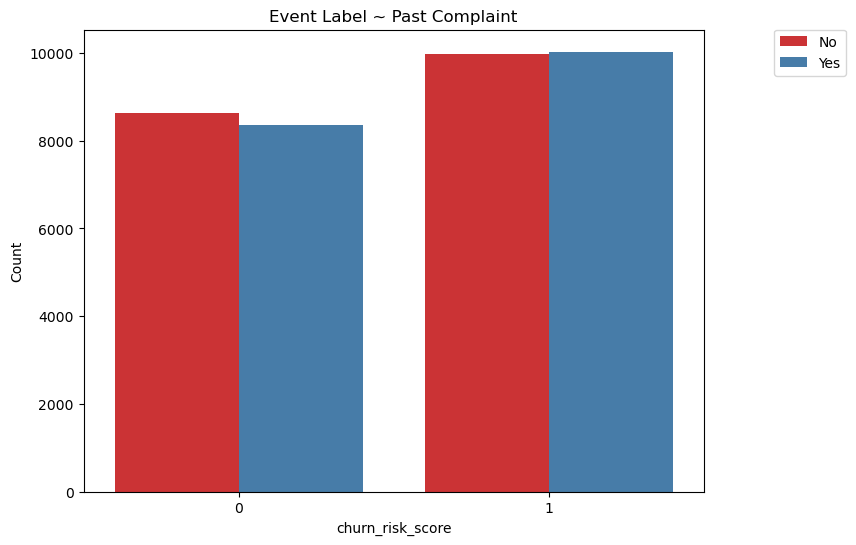

In [330]:
#plot past_complaint in churn_risk_score
past_label = churn.groupby(['churn_risk_score', 'past_complaint']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = past_label, x = 'churn_risk_score', y = 'Count', hue = 'past_complaint', palette = 'Set1')
plt.title("Event Label ~ Past Complaint")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

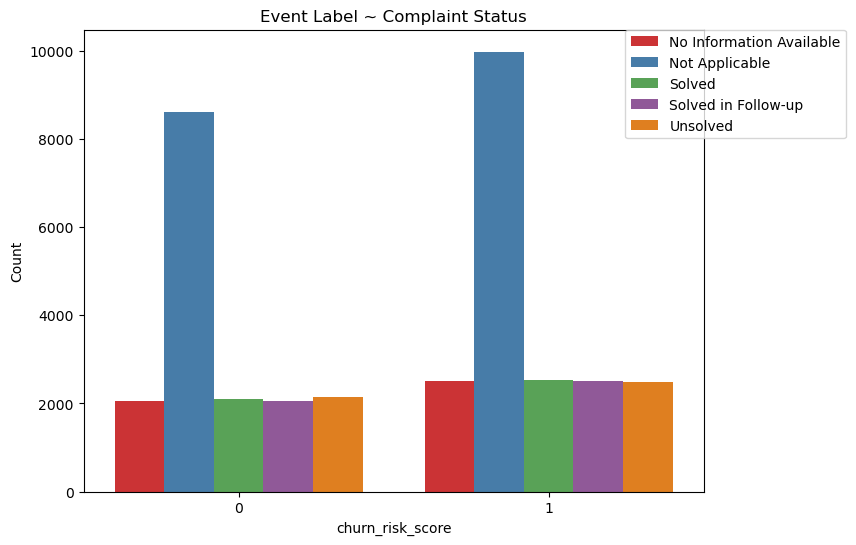

In [331]:
#plot complaint_status in churn_risk_score
complaint_label = churn.groupby(['churn_risk_score', 'complaint_status']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = complaint_label, x = 'churn_risk_score', y = 'Count', hue = 'complaint_status', palette = 'Set1')
plt.title("Event Label ~ Complaint Status")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

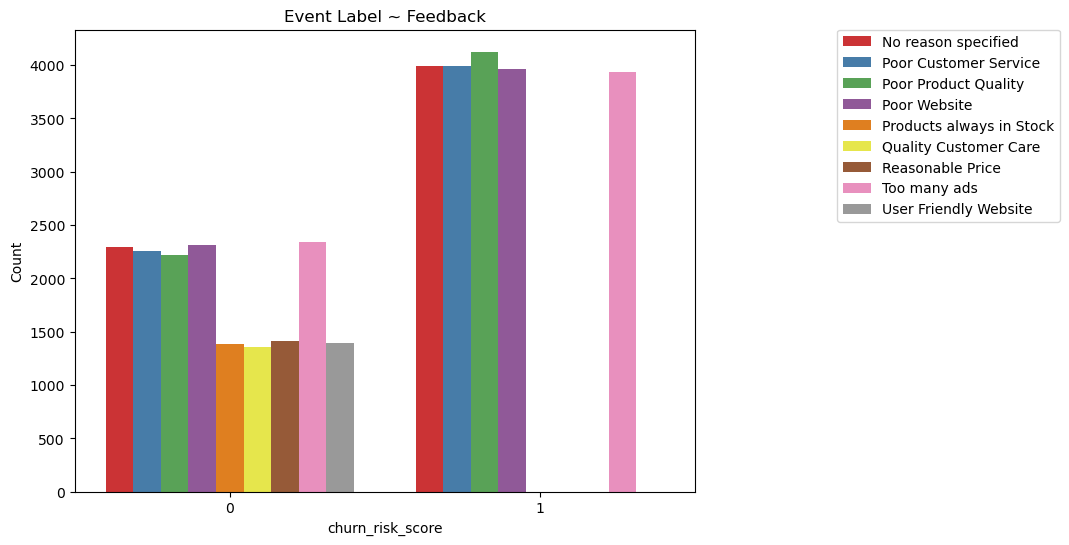

In [332]:
#plot feedback in churn_risk_score
feedback_label = churn.groupby(['churn_risk_score', 'feedback']).size().reset_index(name = 'Count')
plt.figure(figsize = (8,6))
sns.barplot(data = feedback_label, x = 'churn_risk_score', y = 'Count', hue = 'feedback', palette = 'Set1')
plt.title("Event Label ~ Feedback")
plt.legend(bbox_to_anchor = (1.23, 1), borderaxespad = 0)
plt.show()

In [333]:
churn["churn_risk_score"].value_counts()

1    20012
0    16980
Name: churn_risk_score, dtype: int64

<AxesSubplot:xlabel='churn_risk_score', ylabel='Count'>

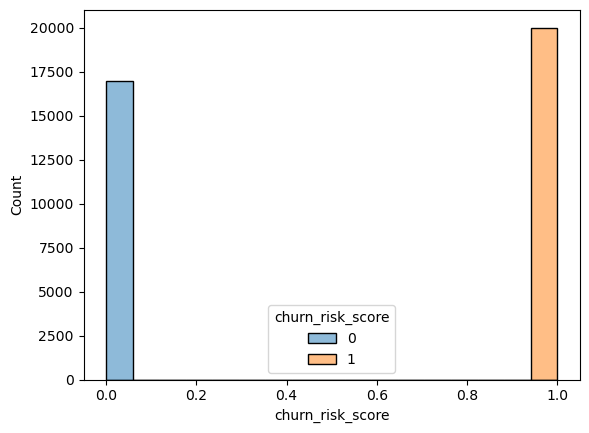

In [334]:
#churn_risk_score_hist
sns.histplot(data = churn, x = "churn_risk_score", hue = "churn_risk_score")

### **5. Data Preprocessing**

#### 5.1 Data Types

In [335]:
X_train.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
dtype: object

**Note :**
- joining_date, security_no, referral_id, last_visit_time, avg_time_spent, avg_transaction_value, avg_frequency_login_days and security_no will drop because we don't focus on time series.

Now, we must check the value!

In [336]:
X_train.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback'],
      dtype='object')

In [337]:
# reset index
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

X_valid = X_valid.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)

X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [338]:
X_train.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,M,BO1RD7I,Town,Gold Membership,2015-01-14,Yes,CID49290,Gift Vouchers/Coupons,Both,...,10,599.41,49202.84,Error,738.460000,No,Yes,No,Not Applicable,Too many ads
1,39,M,9XX2D8Y,NaN,Silver Membership,2016-09-17,Yes,CID62128,Without Offers,Desktop,...,22,95.62,11001.35,15.0,249.450376,No,Yes,Yes,Solved in Follow-up,Poor Website
2,34,F,1LHZ357,City,No Membership,2016-11-05,No,xxxxxxxx,Without Offers,Smartphone,...,12,205.27,40977.25,5.0,568.140000,No,Yes,Yes,Unsolved,Poor Customer Service
3,56,M,ITPQ2FN,Village,Basic Membership,2016-01-16,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,18,42.58,6191.88,27.0,716.410000,Yes,No,Yes,No Information Available,Too many ads
4,23,F,FYJC898,Village,Basic Membership,2017-12-08,No,xxxxxxxx,Without Offers,Desktop,...,10,122.11,10349.56,9.0,671.240000,Yes,No,No,Not Applicable,Poor Customer Service


In [339]:
#Split data into categorical column, numerical column and drop column
categorical_column = ["gender", "region_category", "membership_category",
                    "joined_through_referral", "preferred_offer_types",
                    "medium_of_operation", "internet_option",
                    "used_special_discount", "offer_application_preference",
                    "past_complaint","complaint_status","feedback"]

numerical_column = ["age", "days_since_last_login", "points_in_wallet"]

drop_column = ["security_no", "joining_date", "referral_id", "last_visit_time", "avg_time_spent",
                    "avg_transaction_value", "avg_frequency_login_days"]

In [340]:
X_train.head(2)

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,M,BO1RD7I,Town,Gold Membership,2015-01-14,Yes,CID49290,Gift Vouchers/Coupons,Both,...,10,599.41,49202.84,Error,738.460000,No,Yes,No,Not Applicable,Too many ads
1,39,M,9XX2D8Y,NaN,Silver Membership,2016-09-17,Yes,CID62128,Without Offers,Desktop,...,22,95.62,11001.35,15.0,249.450376,No,Yes,Yes,Solved in Follow-up,Poor Website


*Train Numerical Set*

In [341]:
X_train = X_train.drop(drop_column, axis=1)

In [342]:
X_train_numerical = X_train[numerical_column]

In [343]:
X_train_numerical.head(2)

,age,days_since_last_login,points_in_wallet
0,18,10,738.460000
1,39,22,249.450376


In [344]:
X_train_numerical.isnull().any()

age                      False
days_since_last_login    False
points_in_wallet          True
dtype: bool

*Valid Numerical Set*

In [345]:
X_valid = X_valid.drop(drop_column, axis=1)
X_valid_numerical = X_valid[numerical_column]
X_valid_numerical.head(2)

,age,days_since_last_login,points_in_wallet
0,40,-999,548.87
1,49,17,773.76


*Test Numerical Set*

In [346]:
X_test = X_test.drop(drop_column, axis=1)
X_test_numerical = X_test[numerical_column]
X_test_numerical.head(2)

,age,days_since_last_login,points_in_wallet
0,41,14,793.811069
1,46,6,768.130000


*Train Categorical Set*

In [347]:
X_train_categorical = X_train[categorical_column]
X_train_categorical.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,No,Yes,No,Not Applicable,Too many ads
1,M,NaN,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,No,Yes,Yes,Solved in Follow-up,Poor Website
2,F,City,No Membership,No,Without Offers,Smartphone,Mobile_Data,No,Yes,Yes,Unsolved,Poor Customer Service
3,M,Village,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,Yes,No,Yes,No Information Available,Too many ads
4,F,Village,Basic Membership,No,Without Offers,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Customer Service


In [348]:
X_train_categorical.isnull().any()

gender                          False
region_category                  True
membership_category             False
joined_through_referral         False
preferred_offer_types            True
medium_of_operation             False
internet_option                 False
used_special_discount           False
offer_application_preference    False
past_complaint                  False
complaint_status                False
feedback                        False
dtype: bool

*Valid Categorical Set*

In [349]:
X_valid_categorical = X_valid[categorical_column]
X_valid_categorical.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,NaN,Basic Membership,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,Yes,No,No,Not Applicable,Too many ads
1,M,NaN,Gold Membership,Yes,Gift Vouchers/Coupons,?,Mobile_Data,Yes,No,No,Not Applicable,User Friendly Website
2,F,NaN,Basic Membership,?,Gift Vouchers/Coupons,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Product Quality
3,M,City,Premium Membership,Yes,Credit/Debit Card Offers,Smartphone,Fiber_Optic,No,Yes,No,Not Applicable,Poor Customer Service
4,M,NaN,Platinum Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,No,Not Applicable,No reason specified


*Test Categorical Set*

In [350]:
X_test_categorical = X_test[categorical_column]
X_test_categorical.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,City,Platinum Membership,No,Without Offers,Desktop,Fiber_Optic,Yes,No,Yes,Solved,Too many ads
1,M,Town,Platinum Membership,Yes,Gift Vouchers/Coupons,?,Fiber_Optic,Yes,No,Yes,Unsolved,Products always in Stock
2,F,City,Silver Membership,No,Without Offers,Smartphone,Mobile_Data,Yes,No,No,Not Applicable,User Friendly Website
3,M,City,Basic Membership,No,Credit/Debit Card Offers,?,Fiber_Optic,No,Yes,Yes,Solved in Follow-up,Too many ads
4,F,Village,Silver Membership,Yes,Without Offers,Both,Mobile_Data,No,Yes,Yes,Unsolved,User Friendly Website


#### 5.2 Check Value Data

*Numerical Data*

In [351]:
X_train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25894 entries, 0 to 25893
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    25894 non-null  int64  
 1   days_since_last_login  25894 non-null  int64  
 2   points_in_wallet       23468 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 607.0 KB


In [352]:
X_train_numerical.shape

(25894, 3)

*5.2.1 Column Age*

In [353]:
X_train_numerical["age"].value_counts()

33    512
41    505
61    500
53    498
57    493
17    493
30    490
42    490
59    489
46    489
47    489
56    488
21    488
60    487
55    485
16    482
44    482
32    480
38    478
43    476
34    476
62    476
36    474
29    474
48    473
64    473
13    472
63    472
28    470
37    469
22    468
23    468
14    468
20    467
26    466
10    466
52    465
51    463
12    461
58    459
39    458
45    458
15    453
31    452
19    452
24    452
50    452
11    452
49    450
35    449
18    447
27    445
40    442
25    430
54    428
Name: age, dtype: int64

*5.2.2 Column Days Since Last Login*

*Train Set*

In [354]:
X_train_numerical["days_since_last_login"].value_counts()

 13     1688
 12     1643
 15     1617
 14     1592
 11     1577
 10     1461
 16     1437
-999    1404
 9      1327
 17     1231
 8      1117
 7      1007
 18      963
 19      902
 6       857
 5       855
 20      834
 21      739
 4       713
 22      636
 3       603
 23      515
 2       414
 24      324
 1       226
 25      147
 26       65
Name: days_since_last_login, dtype: int64

In [355]:
X_train_numerical[X_train_numerical["days_since_last_login"] < 0]["days_since_last_login"].count()

1404

In [356]:
X_train_numerical["days_since_last_login"] = X_train_numerical["days_since_last_login"].replace(-999, np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\2287704882.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numerical["days_since_last_login"] = X_train_numerical["days_since_last_login"].replace(-999, np.nan)


In [357]:
X_train_numerical[X_train_numerical["days_since_last_login"] < 0]["days_since_last_login"].count()

0

In [358]:
X_train_numerical["days_since_last_login"].value_counts()

13.0    1688
12.0    1643
15.0    1617
14.0    1592
11.0    1577
10.0    1461
16.0    1437
9.0     1327
17.0    1231
8.0     1117
7.0     1007
18.0     963
19.0     902
6.0      857
5.0      855
20.0     834
21.0     739
4.0      713
22.0     636
3.0      603
23.0     515
2.0      414
24.0     324
1.0      226
25.0     147
26.0      65
Name: days_since_last_login, dtype: int64

In [359]:
X_train_numerical["days_since_last_login"].isnull().sum()

1404

In [360]:
X_train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25894 entries, 0 to 25893
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    25894 non-null  int64  
 1   days_since_last_login  24490 non-null  float64
 2   points_in_wallet       23468 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 607.0 KB


*Valid Set*

In [361]:
X_valid_numerical["days_since_last_login"] = X_valid_numerical["days_since_last_login"].replace(-999, np.nan)
X_valid_numerical[X_valid_numerical["days_since_last_login"] < 0]["days_since_last_login"].count()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\3787163791.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_numerical["days_since_last_login"] = X_valid_numerical["days_since_last_login"].replace(-999, np.nan)


0

*Test Set*

In [362]:
X_test_numerical["days_since_last_login"] = X_test_numerical["days_since_last_login"].replace(-999, np.nan)
X_test_numerical[X_test_numerical["days_since_last_login"] < 0]["days_since_last_login"].count()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\1790433462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_numerical["days_since_last_login"] = X_test_numerical["days_since_last_login"].replace(-999, np.nan)


0

*5.2.3 Column Points in Wallet*

*Train Set*

In [363]:
X_train_numerical["points_in_wallet"].value_counts()

780.920000    8
783.420000    6
719.780000    6
760.580000    6
711.750000    6
             ..
805.150000    1
728.810000    1
377.678169    1
797.150000    1
776.420000    1
Name: points_in_wallet, Length: 18228, dtype: int64

In [364]:
X_train_numerical[X_train_numerical["points_in_wallet"] < 0]["points_in_wallet"].count()

98

In [365]:
X_train_numerical["points_in_wallet"] = X_train_numerical["points_in_wallet"].where(lambda x: x >=0, np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\3908870034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_numerical["points_in_wallet"] = X_train_numerical["points_in_wallet"].where(lambda x: x >=0, np.nan)


In [366]:
X_train_numerical[X_train_numerical["points_in_wallet"] < 0]["points_in_wallet"].count()

0

In [367]:
X_train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25894 entries, 0 to 25893
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    25894 non-null  int64  
 1   days_since_last_login  24490 non-null  float64
 2   points_in_wallet       23370 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 607.0 KB


In [368]:
X_train_numerical.isnull().sum()

age                         0
days_since_last_login    1404
points_in_wallet         2524
dtype: int64

*Valid Set*

In [369]:
X_valid_numerical["points_in_wallet"] = X_valid_numerical["points_in_wallet"].where(lambda x: x >=0, np.nan)
X_valid_numerical[X_valid_numerical["points_in_wallet"] < 0]["points_in_wallet"].count()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\64846708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_numerical["points_in_wallet"] = X_valid_numerical["points_in_wallet"].where(lambda x: x >=0, np.nan)


0

*Test Set*

In [370]:
X_test_numerical["points_in_wallet"] = X_test_numerical["points_in_wallet"].where(lambda x: x >=0, np.nan)
X_test_numerical[X_test_numerical["points_in_wallet"] < 0]["points_in_wallet"].count()

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\2329635643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_numerical["points_in_wallet"] = X_test_numerical["points_in_wallet"].where(lambda x: x >=0, np.nan)


0

In [371]:
X_train_numerical.head(2)

,age,days_since_last_login,points_in_wallet
0,18,10.0,738.460000
1,39,22.0,249.450376


In [372]:
X_valid_numerical.head(2)

,age,days_since_last_login,points_in_wallet
0,40,NaN,548.87
1,49,17.0,773.76


In [373]:
X_test_numerical.head(2)

,age,days_since_last_login,points_in_wallet
0,41,14.0,793.811069
1,46,6.0,768.130000


*5.2.4 Column Gender*

*Categorical Data*

*Train Set*

In [374]:
X_train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25894 entries, 0 to 25893
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   gender                        25894 non-null  object
 1   region_category               22101 non-null  object
 2   membership_category           25894 non-null  object
 3   joined_through_referral       25894 non-null  object
 4   preferred_offer_types         25691 non-null  object
 5   medium_of_operation           25894 non-null  object
 6   internet_option               25894 non-null  object
 7   used_special_discount         25894 non-null  object
 8   offer_application_preference  25894 non-null  object
 9   past_complaint                25894 non-null  object
 10  complaint_status              25894 non-null  object
 11  feedback                      25894 non-null  object
dtypes: object(12)
memory usage: 2.4+ MB


In [375]:
X_train_categorical["gender"].value_counts()

M          12957
F          12892
Unknown       45
Name: gender, dtype: int64

In [376]:
X_train_categorical["gender"] = X_train_categorical["gender"].replace('Unknown', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\1697400525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical["gender"] = X_train_categorical["gender"].replace('Unknown', np.nan)


In [377]:
X_train_categorical["gender"].value_counts()

M    12957
F    12892
Name: gender, dtype: int64

In [378]:
X_train_categorical[X_train_categorical["gender"] == "Unknown"]["gender"].count()

0

In [379]:
X_train_categorical["gender"].isnull().sum()

45

*Valid Set*

In [380]:
X_valid_categorical["gender"] = X_valid_categorical["gender"].replace('Unknown', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\482209402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_categorical["gender"] = X_valid_categorical["gender"].replace('Unknown', np.nan)


*Test Set*

In [381]:
X_test_categorical["gender"] = X_test_categorical["gender"].replace('Unknown', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\2909094098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical["gender"] = X_test_categorical["gender"].replace('Unknown', np.nan)


*5.2.5 Column Region Category*

In [382]:
X_train_categorical["region_category"].value_counts()

Town       9906
City       8870
Village    3325
Name: region_category, dtype: int64

In [383]:
X_train_categorical["region_category"].isnull().sum()

3793

*5.2.6 Column Membership Category*

In [384]:
X_train_categorical["membership_category"].value_counts()

No Membership          5419
Basic Membership       5339
Gold Membership        4752
Silver Membership      4215
Premium Membership     3139
Platinum Membership    3030
Name: membership_category, dtype: int64

In [385]:
X_train_categorical["membership_category"].isnull().sum()

0

*5.2.7 Column Joined Through Referral*

*Train Set*

In [386]:
X_train_categorical["joined_through_referral"].value_counts()

No     11148
Yes    10948
?       3798
Name: joined_through_referral, dtype: int64

In [387]:
X_train_categorical["joined_through_referral"] = X_train_categorical["joined_through_referral"].replace('?', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\3406733136.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical["joined_through_referral"] = X_train_categorical["joined_through_referral"].replace('?', np.nan)


In [388]:
X_train_categorical["joined_through_referral"].value_counts()

No     11148
Yes    10948
Name: joined_through_referral, dtype: int64

In [389]:
X_train_categorical["joined_through_referral"].isnull().sum()

3798

In [390]:
X_train_categorical[X_train_categorical["joined_through_referral"] == "?"]["joined_through_referral"].count()

0

In [391]:
X_train_categorical.head(2)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,No,Yes,No,Not Applicable,Too many ads
1,M,NaN,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,No,Yes,Yes,Solved in Follow-up,Poor Website


*Valid Set*

In [392]:
X_valid_categorical["joined_through_referral"] = X_valid_categorical["joined_through_referral"].replace('?', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\1875110605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_categorical["joined_through_referral"] = X_valid_categorical["joined_through_referral"].replace('?', np.nan)


*Test Set*

In [393]:
X_test_categorical["joined_through_referral"] = X_test_categorical["joined_through_referral"].replace('?', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\1287591835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical["joined_through_referral"] = X_test_categorical["joined_through_referral"].replace('?', np.nan)


*5.2.8 Column Preferred Offer Types*

In [394]:
X_train_categorical["preferred_offer_types"].value_counts()

Gift Vouchers/Coupons       8631
Credit/Debit Card Offers    8612
Without Offers              8448
Name: preferred_offer_types, dtype: int64

In [395]:
X_train_categorical["preferred_offer_types"].isnull().sum()

203

*5.2.9 Column Medium of Operation*

*Train Set*

In [396]:
X_train_categorical["medium_of_operation"].value_counts()

Desktop       9787
Smartphone    9677
?             3795
Both          2635
Name: medium_of_operation, dtype: int64

In [397]:
X_train_categorical["medium_of_operation"] = X_train_categorical["medium_of_operation"].replace('?', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\4292786368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_categorical["medium_of_operation"] = X_train_categorical["medium_of_operation"].replace('?', np.nan)


In [398]:
X_train_categorical["medium_of_operation"].value_counts()

Desktop       9787
Smartphone    9677
Both          2635
Name: medium_of_operation, dtype: int64

In [399]:
X_train_categorical["medium_of_operation"].isnull().sum()

3795

In [400]:
X_train_categorical[X_train_categorical["medium_of_operation"] == "?"]["medium_of_operation"].count()

0

*Valid Set*

In [401]:
X_valid_categorical["medium_of_operation"] = X_valid_categorical["medium_of_operation"].replace('?', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\166783951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_categorical["medium_of_operation"] = X_valid_categorical["medium_of_operation"].replace('?', np.nan)


*Test Set*

In [402]:
X_test_categorical["medium_of_operation"] = X_test_categorical["medium_of_operation"].replace('?', np.nan)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_14248\76034458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_categorical["medium_of_operation"] = X_test_categorical["medium_of_operation"].replace('?', np.nan)


*5.2.10 Column Internet Option*

In [403]:
X_train_categorical["internet_option"].value_counts()

Wi-Fi          8774
Mobile_Data    8616
Fiber_Optic    8504
Name: internet_option, dtype: int64

In [404]:
X_train_categorical["internet_option"].isnull().sum()

0

*5.2.11 Column Used Special Discount*

In [405]:
X_train_categorical["used_special_discount"].value_counts()

Yes    14210
No     11684
Name: used_special_discount, dtype: int64

In [406]:
X_train_categorical["used_special_discount"].isnull().sum()

0

*5.2.12 Column Days Offer Application Preference*

In [407]:
X_train_categorical["offer_application_preference"].value_counts()

Yes    14375
No     11519
Name: offer_application_preference, dtype: int64

In [408]:
X_train_categorical["offer_application_preference"].isnull().sum()

0

*5.2.13 Column Past Complaint*

In [409]:
X_train_categorical["past_complaint"].value_counts()

No     13024
Yes    12870
Name: past_complaint, dtype: int64

In [410]:
X_train_categorical["past_complaint"].isnull().sum()

0

*5.2.14 Column Complaint Status*

In [411]:
X_train_categorical["complaint_status"].value_counts()

Not Applicable              13024
Unsolved                     3259
No Information Available     3227
Solved in Follow-up          3204
Solved                       3180
Name: complaint_status, dtype: int64

In [412]:
X_train_categorical["complaint_status"].isnull().sum()

0

*5.2.15 Column Feedback*

In [413]:
X_train_categorical["feedback"].value_counts()

Poor Product Quality        4479
Poor Website                4425
Poor Customer Service       4399
No reason specified         4381
Too many ads                4318
Reasonable Price             991
User Friendly Website        981
Products always in Stock     970
Quality Customer Care        950
Name: feedback, dtype: int64

In [414]:
X_train_categorical["feedback"].shape

(25894,)

In [415]:
X_train_categorical.head(2)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,No,Yes,No,Not Applicable,Too many ads
1,M,NaN,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,No,Yes,Yes,Solved in Follow-up,Poor Website


In [416]:
X_valid_categorical.head(2)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,NaN,Basic Membership,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,Yes,No,No,Not Applicable,Too many ads
1,M,NaN,Gold Membership,Yes,Gift Vouchers/Coupons,NaN,Mobile_Data,Yes,No,No,Not Applicable,User Friendly Website


In [417]:
X_test_categorical.head(2)

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,City,Platinum Membership,No,Without Offers,Desktop,Fiber_Optic,Yes,No,Yes,Solved,Too many ads
1,M,Town,Platinum Membership,Yes,Gift Vouchers/Coupons,NaN,Fiber_Optic,Yes,No,Yes,Unsolved,Products always in Stock


#### 5.3 Imputation Numerical

In [418]:
X_train_numerical.head()

,age,days_since_last_login,points_in_wallet
0,18,10.0,738.460000
1,39,22.0,249.450376
2,34,12.0,568.140000
3,56,18.0,716.410000
4,23,10.0,671.240000


In [419]:
X_train_numerical.isnull().sum()

age                         0
days_since_last_login    1404
points_in_wallet         2524
dtype: int64

In [420]:
imputer = SimpleImputer(missing_values=np.nan,
                       strategy="median")

In [421]:
#fit imputer
imputer.fit(X_train_numerical)

#transform
imputed_data = imputer.transform(X_train_numerical)
X_train_numerical_imputed = pd.DataFrame(imputed_data)

X_train_numerical_imputed.columns = X_train_numerical.columns
X_train_numerical_imputed.index = X_train_numerical.index

In [422]:
X_train_numerical.head(5)

,age,days_since_last_login,points_in_wallet
0,18,10.0,738.460000
1,39,22.0,249.450376
2,34,12.0,568.140000
3,56,18.0,716.410000
4,23,10.0,671.240000


In [423]:
X_train_numerical_imputed.head(5)

,age,days_since_last_login,points_in_wallet
0,18.0,10.0,738.460000
1,39.0,22.0,249.450376
2,34.0,12.0,568.140000
3,56.0,18.0,716.410000
4,23.0,10.0,671.240000


In [424]:
X_train_numerical_imputed.isnull().any()

age                      False
days_since_last_login    False
points_in_wallet         False
dtype: bool

*Function Numerical Imputation*

In [425]:
def numericalImputation(data, numerical_column):
    """
    Function for imputation numerical data
    :param data: <pandas dataframe> sample input data
    :param numerical_column: <list> list column numerical data
    :return X_train_numerical: <pandas dataframe> numerical data
    :return imputer_numerical: numerical imputer method
    """
    #Filter numerical data
    numerical_data = data[numerical_column]
    
    #Make imputer
    imputer_numerical = SimpleImputer(missing_values=np.nan,
                                     strategy="median")
    imputer_numerical.fit(numerical_data)
    
    #Transform
    imputed_data = imputer_numerical.transform(numerical_data)
    numerical_data_imputed = pd.DataFrame(imputed_data)
    
    numerical_data_imputed.columns = numerical_column
    numerical_data_imputed.index = numerical_data.index
    
    return numerical_data_imputed, imputer_numerical

*Train Set*

In [426]:
#Imputation Numeric
X_train_numerical, imputer_numerical = numericalImputation(data = X_train_numerical,
                                                          numerical_column = numerical_column)

In [427]:
X_train_numerical.isnull().sum()

age                      0
days_since_last_login    0
points_in_wallet         0
dtype: int64

*Valid Set*

In [428]:
#Imputation Numeric
X_valid_numerical, imputer_valid_numerical = numericalImputation(data = X_valid_numerical,
                                                                 numerical_column = numerical_column)
X_valid_numerical.isnull().sum()

age                      0
days_since_last_login    0
points_in_wallet         0
dtype: int64

*Test Set*

In [429]:
#Imputation Numeric
X_test_numerical, imputer_test_numerical = numericalImputation(data = X_test_numerical,
                                                               numerical_column = numerical_column)
X_test_numerical.isnull().sum()

age                      0
days_since_last_login    0
points_in_wallet         0
dtype: int64

#### 5.4 Imputation Categorical

In [430]:
X_train_categorical.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,No,Yes,No,Not Applicable,Too many ads
1,M,NaN,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,No,Yes,Yes,Solved in Follow-up,Poor Website
2,F,City,No Membership,No,Without Offers,Smartphone,Mobile_Data,No,Yes,Yes,Unsolved,Poor Customer Service
3,M,Village,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,Yes,No,Yes,No Information Available,Too many ads
4,F,Village,Basic Membership,No,Without Offers,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Customer Service


In [431]:
X_train_categorical.isnull().sum()

gender                            45
region_category                 3793
membership_category                0
joined_through_referral         3798
preferred_offer_types            203
medium_of_operation             3795
internet_option                    0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [432]:
X_train_categorical = X_train_categorical.dropna(subset=["gender"])

In [433]:
X_train_categorical.isnull().sum()

gender                             0
region_category                 3787
membership_category                0
joined_through_referral         3792
preferred_offer_types            202
medium_of_operation             3782
internet_option                    0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [434]:
X_train_categorical = X_train_categorical.fillna(value="KOSONG")

In [435]:
X_train_categorical.isnull().sum()

gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

*Function Categorical Imputation*

In [436]:
def categoricalImputation(data, categorical_column):
    """
    Function for imputation categorical data
    :param data: <pandas dataframe> sample input data
    :param categorical_column: <list> list column categorical data
    :return categorical_data: <pandas datafarame> categorical data
    """
    #Selection data
    categorical_data = data[categorical_column]
    
    #Imputation
    categorical_data = categorical_data.dropna(subset=["gender"])
    categorical_data = categorical_data.fillna(value="KOSONG")
    
    return categorical_data

*Train Set*

In [437]:
X_train_categorical = categoricalImputation(data = X_train_categorical,
                                           categorical_column=categorical_column)

In [438]:
X_train_categorical.isnull().sum()

gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
dtype: int64

*Valid Set*

In [439]:
X_valid_categorical = categoricalImputation(data = X_valid_categorical,
                                           categorical_column=categorical_column)

*Test Set*

In [440]:
X_test_categorical = categoricalImputation(data = X_test_categorical,
                                           categorical_column=categorical_column)

*Preprocessing Categorical Variables*

In [441]:
categorical_ohe = pd.get_dummies(X_train_categorical)

In [442]:
X_train_categorical.shape

(25849, 12)

In [443]:
categorical_ohe.head()

,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [444]:
def extractCategorical(data, categorical_column):
    """
    Function for extract categorical data with One Hot Encoding
    :param data: <pandas dataframe> data sample
    :param categorical_column: <list> list categorical column
    :return categorical_ohe: <pandas dataframe> data sample with ohe
    """
    data_categorical = categoricalImputation(data=data,
                                            categorical_column=categorical_column)
    categorical_ohe = pd.get_dummies(data_categorical)
    return categorical_ohe

*Train Set*

In [445]:
X_train_categorical_ohe = extractCategorical(data=X_train_categorical,
                                            categorical_column=categorical_column)

In [446]:
X_train_categorical.head()

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,M,Town,Gold Membership,Yes,Gift Vouchers/Coupons,Both,Mobile_Data,No,Yes,No,Not Applicable,Too many ads
1,M,KOSONG,Silver Membership,Yes,Without Offers,Desktop,Mobile_Data,No,Yes,Yes,Solved in Follow-up,Poor Website
2,F,City,No Membership,No,Without Offers,Smartphone,Mobile_Data,No,Yes,Yes,Unsolved,Poor Customer Service
3,M,Village,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,Yes,No,Yes,No Information Available,Too many ads
4,F,Village,Basic Membership,No,Without Offers,Desktop,Fiber_Optic,Yes,No,No,Not Applicable,Poor Customer Service


In [447]:
X_train_categorical_ohe.head() 

,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [448]:
y_train.head()

0    0
1    1
2    1
3    1
4    1
Name: churn_risk_score, dtype: int64

In [449]:
ohe_columns = X_train_categorical_ohe.columns
ohe_columns

Index(['gender_F', 'gender_M', 'region_category_City',
       'region_category_KOSONG', 'region_category_Town',
       'region_category_Village', 'membership_category_Basic Membership',
       'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership',
       'joined_through_referral_KOSONG', 'joined_through_referral_No',
       'joined_through_referral_Yes',
       'preferred_offer_types_Credit/Debit Card Offers',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_KOSONG', 'preferred_offer_types_Without Offers',
       'medium_of_operation_Both', 'medium_of_operation_Desktop',
       'medium_of_operation_KOSONG', 'medium_of_operation_Smartphone',
       'internet_option_Fiber_Optic', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'used_special_discount_No',
       'used

In [450]:
X_train_categorical_ohe.isnull().any()

gender_F                                          False
gender_M                                          False
region_category_City                              False
region_category_KOSONG                            False
region_category_Town                              False
region_category_Village                           False
membership_category_Basic Membership              False
membership_category_Gold Membership               False
membership_category_No Membership                 False
membership_category_Platinum Membership           False
membership_category_Premium Membership            False
membership_category_Silver Membership             False
joined_through_referral_KOSONG                    False
joined_through_referral_No                        False
joined_through_referral_Yes                       False
preferred_offer_types_Credit/Debit Card Offers    False
preferred_offer_types_Gift Vouchers/Coupons       False
preferred_offer_types_KOSONG                    

*Valid Set*

In [451]:
X_valid_categorical_ohe = extractCategorical(data=X_valid_categorical,
                                            categorical_column=categorical_column)
X_valid_categorical_ohe.isnull().sum()

gender_F                                          0
gender_M                                          0
region_category_City                              0
region_category_KOSONG                            0
region_category_Town                              0
region_category_Village                           0
membership_category_Basic Membership              0
membership_category_Gold Membership               0
membership_category_No Membership                 0
membership_category_Platinum Membership           0
membership_category_Premium Membership            0
membership_category_Silver Membership             0
joined_through_referral_KOSONG                    0
joined_through_referral_No                        0
joined_through_referral_Yes                       0
preferred_offer_types_Credit/Debit Card Offers    0
preferred_offer_types_Gift Vouchers/Coupons       0
preferred_offer_types_KOSONG                      0
preferred_offer_types_Without Offers              0
medium_of_op

*Test Set*

In [452]:
X_test_categorical_ohe = extractCategorical(data=X_test_categorical,
                                            categorical_column=categorical_column)
X_test_categorical_ohe.isnull().sum()

gender_F                                          0
gender_M                                          0
region_category_City                              0
region_category_KOSONG                            0
region_category_Town                              0
region_category_Village                           0
membership_category_Basic Membership              0
membership_category_Gold Membership               0
membership_category_No Membership                 0
membership_category_Platinum Membership           0
membership_category_Premium Membership            0
membership_category_Silver Membership             0
joined_through_referral_KOSONG                    0
joined_through_referral_No                        0
joined_through_referral_Yes                       0
preferred_offer_types_Credit/Debit Card Offers    0
preferred_offer_types_Gift Vouchers/Coupons       0
preferred_offer_types_KOSONG                      0
preferred_offer_types_Without Offers              0
medium_of_op

#### 5.5 Join Data Numerical and Categorical

*Train Set*

In [453]:
X_train_concat = pd.concat([X_train_numerical,
                            X_train_categorical_ohe],
                            axis=1)

In [454]:
X_train_concat.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18.0,10.0,738.460000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,39.0,22.0,249.450376,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,34.0,12.0,568.140000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.0,18.0,716.410000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23.0,10.0,671.240000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [455]:
X_train_concat.isnull().sum()

age                                                0
days_since_last_login                              0
points_in_wallet                                   0
gender_F                                          45
gender_M                                          45
region_category_City                              45
region_category_KOSONG                            45
region_category_Town                              45
region_category_Village                           45
membership_category_Basic Membership              45
membership_category_Gold Membership               45
membership_category_No Membership                 45
membership_category_Platinum Membership           45
membership_category_Premium Membership            45
membership_category_Silver Membership             45
joined_through_referral_KOSONG                    45
joined_through_referral_No                        45
joined_through_referral_Yes                       45
preferred_offer_types_Credit/Debit Card Offers

In [456]:
X_train_concat = X_train_concat.dropna()
X_train_concat.isnull().sum()

age                                               0
days_since_last_login                             0
points_in_wallet                                  0
gender_F                                          0
gender_M                                          0
region_category_City                              0
region_category_KOSONG                            0
region_category_Town                              0
region_category_Village                           0
membership_category_Basic Membership              0
membership_category_Gold Membership               0
membership_category_No Membership                 0
membership_category_Platinum Membership           0
membership_category_Premium Membership            0
membership_category_Silver Membership             0
joined_through_referral_KOSONG                    0
joined_through_referral_No                        0
joined_through_referral_Yes                       0
preferred_offer_types_Credit/Debit Card Offers    0
preferred_of

*Valid Set*

In [457]:
X_valid_concat = pd.concat([X_valid_numerical,
                            X_valid_categorical_ohe],
                            axis=1)
X_valid_concat = X_valid_concat.dropna()
X_valid_concat.isnull().sum()

age                                               0
days_since_last_login                             0
points_in_wallet                                  0
gender_F                                          0
gender_M                                          0
region_category_City                              0
region_category_KOSONG                            0
region_category_Town                              0
region_category_Village                           0
membership_category_Basic Membership              0
membership_category_Gold Membership               0
membership_category_No Membership                 0
membership_category_Platinum Membership           0
membership_category_Premium Membership            0
membership_category_Silver Membership             0
joined_through_referral_KOSONG                    0
joined_through_referral_No                        0
joined_through_referral_Yes                       0
preferred_offer_types_Credit/Debit Card Offers    0
preferred_of

In [458]:
X_valid_concat.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,40.0,13.0,548.870000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49.0,17.0,773.760000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.0,12.0,353.290489,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,13.0,797.180000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48.0,14.0,758.740000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Test Set*

In [459]:
X_test_concat = pd.concat([X_test_numerical,
                            X_test_categorical_ohe],
                            axis=1)
X_test_concat = X_test_concat.dropna()
X_test_concat.isnull().sum()

age                                               0
days_since_last_login                             0
points_in_wallet                                  0
gender_F                                          0
gender_M                                          0
region_category_City                              0
region_category_KOSONG                            0
region_category_Town                              0
region_category_Village                           0
membership_category_Basic Membership              0
membership_category_Gold Membership               0
membership_category_No Membership                 0
membership_category_Platinum Membership           0
membership_category_Premium Membership            0
membership_category_Silver Membership             0
joined_through_referral_KOSONG                    0
joined_through_referral_No                        0
joined_through_referral_Yes                       0
preferred_offer_types_Credit/Debit Card Offers    0
preferred_of

In [460]:
X_test_concat.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,41.0,14.0,793.811069,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,46.0,6.0,768.130000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,51.0,19.0,774.780000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,40.0,16.0,504.670000,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18.0,9.0,755.690000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### 5.6 Standardizing Variables

*Train Set*

In [461]:
from sklearn.preprocessing import StandardScaler

# Make Function
def standardizerData(data, standardizer = None):
    """
    Function for data standarization
    :param data: <pandas dataframe> sample data
    :return standardized_data: <pandas dataframe> sample data standard
    :return standardizer: method for data standarization
    """
    data_columns = data.columns  # prevent column data being lost
    data_index = data.index  # prevent index data being lost

    # make (fit) standardizer
    if standardizer != None:
        pass
    else:
        # make & fit encoder
        standardizer = StandardScaler()
        standardizer.fit(data)

    # transform data
    standardized_data = standardizer.transform(data)
    standardized_data = pd.DataFrame(standardized_data,
                                    columns = data.columns,
                                    index = data.index)

    return standardized_data, standardizer

In [462]:
def prepare_test(data, standardizer):  
    """
    Function for data standarization
    :param data: <pandas dataframe> sample data
    :return X_clean: <pandas dataframe> sample data standard
    """
    # Scaled data
    X_clean, _ = standardizerData(data = data,
                                  standardizer = standardizer)
    return X_clean

In [463]:
X_train_clean, scaler_train = standardizerData(data=X_train_concat)

In [464]:
X_train_clean

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,-1.206558,-0.512906,0.268487,-0.997489,0.997489,-0.721973,-0.414310,1.270711,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
1,0.116142,1.698067,-2.474832,-0.997489,0.997489,-0.721973,2.413653,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,2.202762,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
2,-0.198787,-0.144410,-0.686999,1.002518,-1.002518,1.385093,-0.414310,-0.786961,-0.383816,-0.509485,...,2.636029,-0.451308,2.211524,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
3,1.186899,0.961076,0.144788,-0.997489,0.997489,-0.721973,-0.414310,-0.786961,2.605415,1.962766,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
4,-0.891630,-0.512906,-0.108614,1.002518,-1.002518,-0.721973,-0.414310,-0.786961,2.605415,1.962766,...,-0.379359,-0.451308,2.211524,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25889,1.312870,-1.249897,-1.589980,1.002518,-1.002518,-0.721973,-0.414310,1.270711,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
25890,1.186899,-1.802640,0.481441,1.002518,-1.002518,-0.721973,-0.414310,1.270711,-0.383816,-0.509485,...,2.636029,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,5.037512
25891,-1.080587,-0.512906,0.043023,1.002518,-1.002518,-0.721973,2.413653,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,2.186660,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
25892,1.249885,0.592581,0.018620,-0.997489,0.997489,-0.721973,-0.414310,1.270711,-0.383816,1.962766,...,-0.379359,2.215783,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511


In [465]:
X_train_concat.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,18.0,10.0,738.460000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,39.0,22.0,249.450376,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,34.0,12.0,568.140000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,56.0,18.0,716.410000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,23.0,10.0,671.240000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [466]:
X_train_clean.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,-1.206558,-0.512906,0.268487,-0.997489,0.997489,-0.721973,-0.414310,1.270711,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
1,0.116142,1.698067,-2.474832,-0.997489,0.997489,-0.721973,2.413653,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,2.202762,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
2,-0.198787,-0.144410,-0.686999,1.002518,-1.002518,1.385093,-0.414310,-0.786961,-0.383816,-0.509485,...,2.636029,-0.451308,2.211524,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
3,1.186899,0.961076,0.144788,-0.997489,0.997489,-0.721973,-0.414310,-0.786961,2.605415,1.962766,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
4,-0.891630,-0.512906,-0.108614,1.002518,-1.002518,-0.721973,-0.414310,-0.786961,2.605415,1.962766,...,-0.379359,-0.451308,2.211524,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511


*Valid and Test Set*

In [467]:
X_valid_concat.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,40.0,13.0,548.870000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,49.0,17.0,773.760000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,46.0,12.0,353.290489,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,40.0,13.0,797.180000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,48.0,14.0,758.740000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [468]:
X_valid_clean = prepare_test(data = X_valid_concat, 
                            standardizer = scaler_train)

X_valid_clean.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.179128,0.039838,-0.795103,-0.997489,0.997489,-0.721973,2.413653,-0.786961,-0.383816,1.962766,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
1,0.745999,0.776828,0.466518,-0.997489,0.997489,-0.721973,2.413653,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,5.037512
2,0.557042,-0.144410,-1.892294,1.002518,-1.002518,-0.721973,2.413653,-0.786961,-0.383816,1.962766,...,-0.379359,-0.451308,-0.452177,2.186660,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
3,0.179128,0.039838,0.597903,-0.997489,0.997489,1.385093,-0.414310,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,2.211524,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511
4,0.683013,0.224085,0.382257,-0.997489,0.997489,-0.721973,2.413653,-0.786961,-0.383816,-0.509485,...,-0.379359,2.215783,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,-0.198511


In [469]:
X_test_clean = prepare_test(data = X_test_concat, 
                            standardizer = scaler_train)

X_test_clean.head()

,age,days_since_last_login,points_in_wallet,gender_F,gender_M,region_category_City,region_category_KOSONG,region_category_Town,region_category_Village,membership_category_Basic Membership,...,complaint_status_Unsolved,feedback_No reason specified,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.242113,0.224085,0.579004,1.002518,-1.002518,1.385093,-0.41431,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
1,0.557042,-1.249897,0.434934,-0.997489,0.997489,-0.721973,-0.41431,1.270711,-0.383816,-0.509485,...,2.636029,-0.451308,-0.452177,-0.457319,-0.453975,5.069863,-0.195117,-0.199666,-0.447452,-0.198511
2,0.871970,1.145324,0.472240,1.002518,-1.002518,1.385093,-0.41431,-0.786961,-0.383816,-0.509485,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,5.037512
3,0.179128,0.592581,-1.043063,-0.997489,0.997489,1.385093,-0.41431,-0.786961,-0.383816,1.962766,...,-0.379359,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,2.234875,-0.198511
4,-1.206558,-0.697153,0.365146,1.002518,-1.002518,-0.721973,-0.41431,-0.786961,2.605415,-0.509485,...,2.636029,-0.451308,-0.452177,-0.457319,-0.453975,-0.197244,-0.195117,-0.199666,-0.447452,5.037512


In [470]:
X_train_clean.shape

(25849, 49)

In [471]:
y_train.shape

(25894,)

In [472]:
type(y_train)

pandas.core.series.Series

In [473]:
type(X_train_clean.index)

pandas.core.indexes.numeric.Int64Index

In [474]:
y_train[X_train_clean.index]

0        0
1        1
2        1
3        1
4        1
        ..
25889    0
25890    0
25891    1
25892    1
25893    0
Name: churn_risk_score, Length: 25849, dtype: int64

In [475]:
y_train = y_train[X_train_clean.index]
y_valid = y_valid[X_valid_clean.index]
y_test = y_test[X_test_clean.index]
X_train_clean.shape, y_train.shape, X_valid_clean.shape, y_valid.shape, X_test_clean.shape, y_test.shape

((25849, 49), (25849,), (5541, 49), (5541,), (5543, 49), (5543,))

#### 5.7 Baseline Model

In [476]:
y_train.value_counts(normalize=True)

1    0.541027
0    0.458973
Name: churn_risk_score, dtype: float64

In [477]:
#Save to pickle
joblib.dump(X_train_clean, "../data/processed/X_train.pkl")
joblib.dump(y_train, "../data/processed/y_train.pkl")

joblib.dump(X_valid_clean, "../data/processed/X_valid.pkl")
joblib.dump(y_valid, "../data/processed/y_valid.pkl")

joblib.dump(X_test_clean, "../data/processed/X_test.pkl")
joblib.dump(y_test, "../data/processed/y_test.pkl")

['../data/processed/y_test.pkl']

In [478]:
#Load pickle
X_train = joblib.load("../data/processed/X_train.pkl")
y_train = joblib.load("../data/processed/y_train.pkl")

X_valid = joblib.load("../data/processed/X_valid.pkl")
y_valid = joblib.load("../data/processed/y_valid.pkl")

X_test = joblib.load("../data/processed/X_test.pkl")
y_test = joblib.load("../data/processed/y_test.pkl")

In [479]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape,

((25849, 49), (25849,), (5541, 49), (5541,), (5543, 49), (5543,))

In [480]:
#regex
import re

regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [481]:
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]

X_valid.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_valid.columns.values]

X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]

In [482]:
print("x_train:", list(X_train.columns))
print("------")
print("x_valid:", list(X_valid.columns))
print("------")
print("x_test:", list(X_test.columns))

x_train: ['age', 'days_since_last_login', 'points_in_wallet', 'gender_F', 'gender_M', 'region_category_City', 'region_category_KOSONG', 'region_category_Town', 'region_category_Village', 'membership_category_Basic Membership', 'membership_category_Gold Membership', 'membership_category_No Membership', 'membership_category_Platinum Membership', 'membership_category_Premium Membership', 'membership_category_Silver Membership', 'joined_through_referral_KOSONG', 'joined_through_referral_No', 'joined_through_referral_Yes', 'preferred_offer_types_Credit/Debit Card Offers', 'preferred_offer_types_Gift Vouchers/Coupons', 'preferred_offer_types_KOSONG', 'preferred_offer_types_Without Offers', 'medium_of_operation_Both', 'medium_of_operation_Desktop', 'medium_of_operation_KOSONG', 'medium_of_operation_Smartphone', 'internet_option_Fiber_Optic', 'internet_option_Mobile_Data', 'internet_option_Wi-Fi', 'used_special_discount_No', 'used_special_discount_Yes', 'offer_application_preference_No', 'offe

#### 5.8 Modelling

#### Logistic Regression

In [483]:
logreg = LogisticRegression(solver = "liblinear",
                            random_state=123)

In [484]:
param_logreg = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 8, 20)}
logreg_cv = GridSearchCV(estimator=logreg,
                        param_grid=param_logreg,
                        cv=5)

In [485]:
logreg_cv.fit(X=X_train,
             y=y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=123, solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 4.83293024e-05, 2.33572147e-04, 1.12883789e-03,
       5.45559478e-03, 2.63665090e-02, 1.27427499e-01, 6.15848211e-01,
       2.97635144e+00, 1.43844989e+01, 6.95192796e+01, 3.35981829e+02,
       1.62377674e+03, 7.84759970e+03, 3.79269019e+04, 1.83298071e+05,
       8.85866790e+05, 4.28133240e+06, 2.06913808e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']})

In [486]:
# Best params
logreg_cv.best_params_

{'C': 0.026366508987303583, 'penalty': 'l1'}

In [487]:
# Make best model
logreg = LogisticRegression(penalty = logreg_cv.best_params_["penalty"],
                            C = logreg_cv.best_params_["C"],
                            solver = "liblinear",
                            random_state = 123)

# Fit model
logreg.fit(X_train, y_train)

LogisticRegression(C=0.026366508987303583, penalty='l1', random_state=123,
                   solver='liblinear')

Valid Dataset

In [488]:
y_pred_train_proba_logreg = logreg.predict_proba(X_valid)
y_pred_train_proba_logreg

array([[2.63078824e-02, 9.73692118e-01],
       [9.79952324e-01, 2.00476763e-02],
       [1.47516222e-02, 9.85248378e-01],
       ...,
       [9.99629362e-01, 3.70638165e-04],
       [2.62615904e-01, 7.37384096e-01],
       [3.46011328e-02, 9.65398867e-01]])

In [489]:
y_pred_train_logreg = logreg.predict(X_valid)
y_pred_train_logreg

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [490]:
confusion_matrix(y_true = y_valid,
                 y_pred = y_pred_train_logreg)

array([[2362,  181],
       [ 300, 2698]], dtype=int64)

In [491]:
print(classification_report(y_true = y_valid,
                            y_pred = y_pred_train_logreg))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2543
           1       0.94      0.90      0.92      2998

    accuracy                           0.91      5541
   macro avg       0.91      0.91      0.91      5541
weighted avg       0.91      0.91      0.91      5541



Test Dataset

In [492]:
y_pred_test_proba_logreg = logreg.predict_proba(X_test)
y_pred_test_proba_logreg

array([[9.92621754e-01, 7.37824631e-03],
       [9.99793942e-01, 2.06057919e-04],
       [9.78691983e-01, 2.13080171e-02],
       ...,
       [3.51859406e-02, 9.64814059e-01],
       [2.81896702e-02, 9.71810330e-01],
       [9.81679754e-01, 1.83202459e-02]])

In [493]:
y_pred_test_logreg = logreg.predict(X_test)
y_pred_test_logreg

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [494]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_logreg)

array([[2374,  169],
       [ 322, 2678]], dtype=int64)

In [495]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_logreg))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2543
           1       0.94      0.89      0.92      3000

    accuracy                           0.91      5543
   macro avg       0.91      0.91      0.91      5543
weighted avg       0.91      0.91      0.91      5543



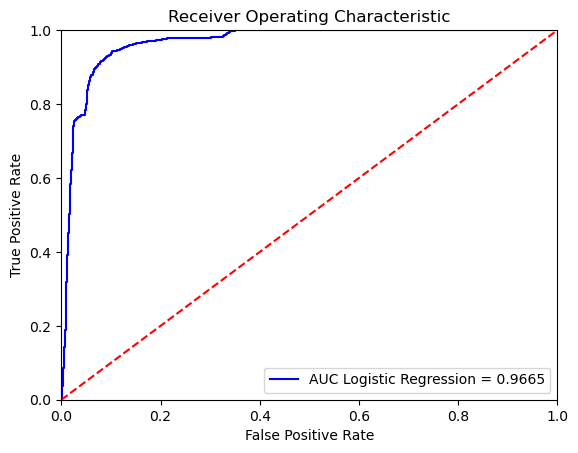

In [496]:
# ROC Curve
fpr_logreg, tpr_logreg, threshold_logreg = roc_curve(y_test,
                                         y_pred_test_proba_logreg[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Naive Bayes

In [497]:
nvb = GaussianNB()

In [498]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [499]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=123)

In [500]:
from sklearn.preprocessing import PowerTransformer


In [501]:
param_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_cv = GridSearchCV(estimator=nvb,
                     param_grid=param_nb,
                     cv=5)

In [502]:
nb_cv.fit(X=X_train,
          y=y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])})

In [503]:
nb_cv.best_params_

{'var_smoothing': 0.03511191734215131}

In [504]:
# Buat best model
nvb = GaussianNB(var_smoothing = nb_cv.best_params_["var_smoothing"])

# Fit model
nvb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.03511191734215131)

Valid Dataset

In [505]:
y_pred_train_proba_nb = nvb.predict_proba(X_valid)
y_pred_train_proba_nb

array([[8.22174785e-016, 1.00000000e+000],
       [1.00000000e+000, 8.44120137e-165],
       [2.65822248e-016, 1.00000000e+000],
       ...,
       [1.00000000e+000, 3.59959496e-221],
       [3.33064086e-005, 9.99966694e-001],
       [1.54369285e-015, 1.00000000e+000]])

In [506]:
y_pred_train_nb = nvb.predict(X_valid)
y_pred_train_nb

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [507]:
confusion_matrix(y_true = y_valid,
                 y_pred = y_pred_train_nb)

array([[1644,  899],
       [   0, 2998]], dtype=int64)

In [508]:
print(classification_report(y_true = y_valid,
                            y_pred = y_pred_train_nb))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79      2543
           1       0.77      1.00      0.87      2998

    accuracy                           0.84      5541
   macro avg       0.88      0.82      0.83      5541
weighted avg       0.88      0.84      0.83      5541



Test Dataset

In [509]:
y_pred_test_proba_nb = nvb.predict_proba(X_test)
y_pred_test_proba_nb

array([[1.00000000e+000, 1.73498269e-055],
       [1.00000000e+000, 3.05863369e-225],
       [1.00000000e+000, 1.72948292e-164],
       ...,
       [1.20033872e-015, 1.00000000e+000],
       [9.42879499e-016, 1.00000000e+000],
       [1.00000000e+000, 2.66010833e-170]])

In [510]:
y_pred_test_nb = nvb.predict(X_test)
y_pred_test_nb

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [511]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_nb)

array([[1642,  901],
       [   0, 3000]], dtype=int64)

In [512]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_nb))

              precision    recall  f1-score   support

           0       1.00      0.65      0.78      2543
           1       0.77      1.00      0.87      3000

    accuracy                           0.84      5543
   macro avg       0.88      0.82      0.83      5543
weighted avg       0.87      0.84      0.83      5543



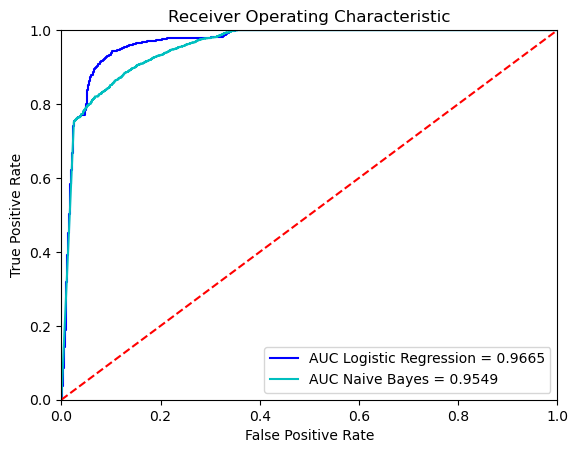

In [513]:
 # ROC Curve
fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test,
                                         y_pred_test_proba_nb[:, 1])
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, 'c', label = 'AUC Naive Bayes = %0.4f' % roc_auc_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Decision Tree

In [514]:
dct = DecisionTreeClassifier(random_state=123)

In [515]:
params_dct = {
    "max_depth" : [3,5,7,15,20],
    "min_samples_split" : [2,4,6],
    "max_features" : ["auto", "sqrt", "log2"]
}
dct_cv = GridSearchCV(estimator=dct,
                     param_grid=params_dct,
                     cv=5)

In [516]:
dct_cv.fit(X=X_train,
           y=y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6]})

In [517]:
# Best params
dct_cv.best_params_

{'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 2}

In [518]:
# Buat best model
dct = DecisionTreeClassifier(max_depth = dct_cv.best_params_["max_depth"],
                            max_features = dct_cv.best_params_["max_features"],
                            min_samples_split = dct_cv.best_params_["min_samples_split"],
                            random_state = 123)

# Fit model
dct.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, max_features='log2', random_state=123)

Valid Dataset

In [519]:
y_pred_train_proba_dct = dct.predict_proba(X_valid)
y_pred_train_proba_dct

array([[0.03061224, 0.96938776],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       ...,
       [1.        , 0.        ],
       [0.17333333, 0.82666667],
       [0.02475248, 0.97524752]])

In [520]:
y_pred_train_dct = dct.predict(X_valid)
y_pred_train_dct

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [521]:
confusion_matrix(y_true = y_valid,
                 y_pred = y_pred_train_dct)

array([[2158,  385],
       [ 311, 2687]], dtype=int64)

In [522]:
print(classification_report(y_true = y_valid,
                            y_pred = y_pred_train_dct)) 

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      2543
           1       0.87      0.90      0.89      2998

    accuracy                           0.87      5541
   macro avg       0.87      0.87      0.87      5541
weighted avg       0.87      0.87      0.87      5541



Test Dataset

In [523]:
y_pred_test_proba_dct = dct.predict_proba(X_test)
y_pred_test_proba_dct

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.        , 1.        ],
       [0.04918033, 0.95081967],
       [1.        , 0.        ]])

In [524]:
y_pred_test_dct = dct.predict(X_test)
y_pred_test_dct

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [525]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_dct)

array([[2212,  331],
       [ 363, 2637]], dtype=int64)

In [526]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_dct))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      2543
           1       0.89      0.88      0.88      3000

    accuracy                           0.87      5543
   macro avg       0.87      0.87      0.87      5543
weighted avg       0.87      0.87      0.87      5543



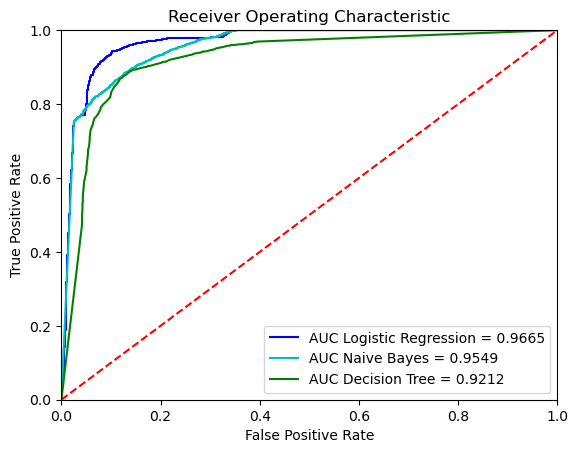

In [527]:
 # ROC Curve
fpr_dct, tpr_dct, threshold_dct = roc_curve(y_test,
                                         y_pred_test_proba_dct[:, 1])
roc_auc_dct = auc(fpr_dct, tpr_dct)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, 'c', label = 'AUC Naive Bayes = %0.4f' % roc_auc_nb)
plt.plot(fpr_dct, tpr_dct, 'g', label = 'AUC Decision Tree = %0.4f' % roc_auc_dct)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### SVM

In [528]:
svc = SVC(random_state=123)

In [529]:
param_svc = {"kernel": ["linear", "rbf"],
             "C": [0.1, 1, 10]}
svc_cv = GridSearchCV(estimator=svc,
                      param_grid=param_svc,
                      cv=5)

In [530]:
svc_cv.fit(X=X_train,
        y=y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=123),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [531]:
svc_cv.best_params_

{'C': 1, 'kernel': 'rbf'}

In [532]:
# Buat best model
svc = SVC(kernel = svc_cv.best_params_["kernel"],
          C = svc_cv.best_params_["C"],
          probability=True,
         random_state=123)

# Fit model
svc.fit(X_train, y_train)

SVC(C=1, probability=True, random_state=123)

Valid Dataset

In [533]:
y_pred_train_proba_svc = svc.predict_proba(X_valid)
y_pred_train_proba_svc

array([[0.04378346, 0.95621654],
       [0.96040382, 0.03959618],
       [0.04161532, 0.95838468],
       ...,
       [0.9900085 , 0.0099915 ],
       [0.17996009, 0.82003991],
       [0.04295849, 0.95704151]])

In [534]:
y_pred_train_svc = svc.predict(X_valid)
y_pred_train_svc

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [535]:
confusion_matrix(y_true = y_valid,
                 y_pred = y_pred_train_svc)

array([[2228,  315],
       [ 384, 2614]], dtype=int64)

In [536]:
print(classification_report(y_true = y_valid,
                            y_pred = y_pred_train_svc))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      2543
           1       0.89      0.87      0.88      2998

    accuracy                           0.87      5541
   macro avg       0.87      0.87      0.87      5541
weighted avg       0.87      0.87      0.87      5541



Test Dataset

In [537]:
y_pred_test_proba_svc = svc.predict_proba(X_test)
y_pred_test_proba_svc

array([[0.9871917 , 0.0128083 ],
       [0.98823589, 0.01176411],
       [0.97806457, 0.02193543],
       ...,
       [0.10051352, 0.89948648],
       [0.03696008, 0.96303992],
       [0.96586192, 0.03413808]])

In [538]:
y_pred_test_svc = svc.predict(X_test)
y_pred_test_svc

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [539]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_svc)

array([[2257,  286],
       [ 398, 2602]], dtype=int64)

In [540]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2543
           1       0.90      0.87      0.88      3000

    accuracy                           0.88      5543
   macro avg       0.88      0.88      0.88      5543
weighted avg       0.88      0.88      0.88      5543



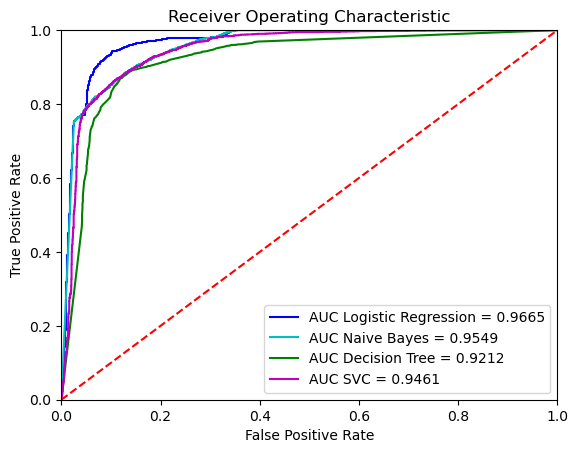

In [541]:
# ROC Curve
fpr_svc, tpr_svc, threshold_svc = roc_curve(y_test,
                                         y_pred_test_proba_svc[:, 1])
roc_auc_svc = auc(fpr_svc, tpr_svc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, 'c', label = 'AUC Naive Bayes = %0.4f' % roc_auc_nb)
plt.plot(fpr_dct, tpr_dct, 'g', label = 'AUC Decision Tree = %0.4f' % roc_auc_dct)
plt.plot(fpr_svc, tpr_svc, 'm', label = 'AUC SVC = %0.4f' % roc_auc_svc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Random Forest

In [542]:
random_forest = RandomForestClassifier(random_state=123)

In [543]:
params_randomforest = {
    "n_estimators":[100,200,300],
    "max_depth" : [2,3,4,5],
    "criterion" : ["gini", "entrophy", "log_loss"],
    "max_features" : ["sqrt", "log2"]

}

rf_cv = GridSearchCV(estimator = random_forest,
                     param_grid = params_randomforest,
                     cv = 5,
                     n_jobs=-1,
                     verbose=2)

In [544]:
rf_cv.fit(X = X_train,
          y = y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


C:\Users\UYUN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
240 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\UYUN\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\UYUN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\UYUN\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\UYUN\anaconda3\lib\site-packages\jobl

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entrophy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [545]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 300}

Valid Dataset

In [546]:
# Refit RF
random_forest = RandomForestClassifier(n_estimators = rf_cv.best_params_["n_estimators"],
                max_depth = rf_cv.best_params_["max_depth"],
                criterion = rf_cv.best_params_["criterion"],
                max_features = rf_cv.best_params_["max_features"],
                random_state = 123)

# Fit model
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=300,
                       random_state=123)

In [547]:
y_pred_train_proba_rf = random_forest.predict_proba(X_valid)
y_pred_train_proba_rf

array([[0.19761548, 0.80238452],
       [0.75307136, 0.24692864],
       [0.18662984, 0.81337016],
       ...,
       [0.72196772, 0.27803228],
       [0.3556948 , 0.6443052 ],
       [0.18616695, 0.81383305]])

In [548]:
y_pred_train_rf = random_forest.predict(X_valid)
y_pred_train_rf

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [549]:
confusion_matrix(y_true = y_valid,
                 y_pred = y_pred_train_rf)

array([[2311,  232],
       [ 163, 2835]], dtype=int64)

In [550]:
print(classification_report(y_true = y_valid,
                            y_pred = y_pred_train_rf))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2543
           1       0.92      0.95      0.93      2998

    accuracy                           0.93      5541
   macro avg       0.93      0.93      0.93      5541
weighted avg       0.93      0.93      0.93      5541



Test Dataset

In [551]:
y_pred_test_proba_rf = random_forest.predict_proba(X_test)
y_pred_test_proba_rf

array([[0.74515871, 0.25484129],
       [0.83818588, 0.16181412],
       [0.73710141, 0.26289859],
       ...,
       [0.20015663, 0.79984337],
       [0.18206293, 0.81793707],
       [0.76653675, 0.23346325]])

In [552]:
y_pred_test_rf = random_forest.predict(X_test)
y_pred_test_rf

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [553]:
confusion_matrix(y_true = y_test,
                 y_pred = y_pred_test_rf)

array([[2326,  217],
       [ 152, 2848]], dtype=int64)

In [554]:
print(classification_report(y_true = y_test,
                            y_pred = y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      2543
           1       0.93      0.95      0.94      3000

    accuracy                           0.93      5543
   macro avg       0.93      0.93      0.93      5543
weighted avg       0.93      0.93      0.93      5543



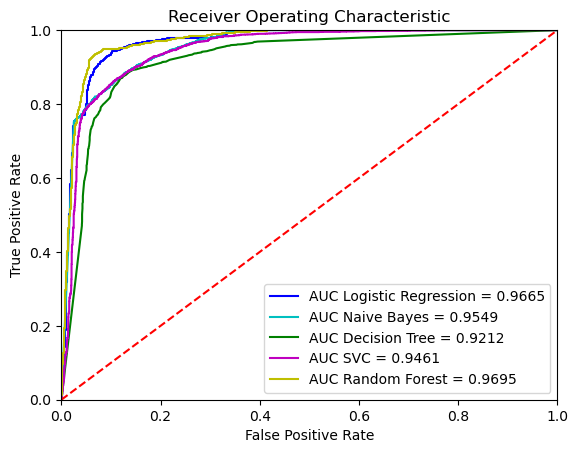

In [555]:
# ROC Curve
fpr_rf, tpr_rf, threshold_rf = roc_curve(y_test,
                                         y_pred_test_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_logreg, tpr_logreg, 'b', label = 'AUC Logistic Regression = %0.4f' % roc_auc_logreg)
plt.plot(fpr_nb, tpr_nb, 'c', label = 'AUC Naive Bayes = %0.4f' % roc_auc_nb)
plt.plot(fpr_dct, tpr_dct, 'g', label = 'AUC Decision Tree = %0.4f' % roc_auc_dct)
plt.plot(fpr_svc, tpr_svc, 'm', label = 'AUC SVC = %0.4f' % roc_auc_svc)
plt.plot(fpr_rf, tpr_rf, 'y', label = 'AUC Random Forest = %0.4f' % roc_auc_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()